#Packages

In [ ]:
!pip install requests

In [ ]:
pip install ruptures

     |████████████████████████████████| 921kB 5.8MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.fftpack
from scipy.fft import fft, fftfreq
import ruptures as rpt

from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.utils import shuffle

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from subprocess import call
from IPython.display import Image

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend

import tensorflow as tf

In [ ]:
#Import all csv files from github
import requests
url='https://raw.githubusercontent.com/kaiyang7766/ExploratoryDataAnalysis/main/Load_Data/LoadData.py'
r=requests.get(url)
with open('LoadData.py','w') as f:
  f.write(r.text)

import LoadData as LD
#List of dataframes imported:
bukitPanjangToExpo_s6edge=LD.bukitPanjangToExpo_s6edge
bukitPanjangToExpo_iphone12pro=LD.bukitPanjangToExpo_iphone12pro
woodlandNorthToWoodlandSouth_s6edge=LD.woodlandNorthToWoodlandSouth_s6edge
woodlandNorthToWoodlandSouth_iphone12pro=LD.woodlandNorthToWoodlandSouth_iphone12pro
harbourFrontToPunggol_s6edge=LD.harbourFrontToPunggol_s6edge
harbourFrontToPunggol_iphone12pro=LD.purple
harbourfrontToDhobyGhautToMarinaBay_s6edge=LD.harbourfrontToDhobyGhautToMarinaBay_s6edge
harbourfrontToDhobyGhautToMarinaBay_iphone11=LD.harbourfrontToDhobyGhautToMarinaBay_iphone11

In [ ]:
#Import all functions from github
url='https://raw.githubusercontent.com/kaiyang7766/ExploratoryDataAnalysis/main/Load_Data/LoadFunctions_old.py'
r=requests.get(url)
with open('LoadFunctions_old.py','w') as f:
  f.write(r.text)

from LoadFunctions_old import *

In [ ]:
DT_Stations = ['DT1_Bukit_Panjang', 'DT2_Cashew', 'DT3_Hillview','DT5_Beauty_World', 'DT6_King_Albert_Park', 'DT7_Sixth_Avenue', 'DT8_Tan_Kah_Kee', 'DT9_Botanic_Gardens', 'DT10_Stevens','DT11_Newton','DT12_Little_India','DT13_Rochor','DT14_Bugis', 'DT15_Promenade','DT16_Bayfront','DT17_Downtown','DT18_Telok Ayer','DT19_Chinatown','DT20_Fort_Canning','DT21_Bencoolen','DT22_Jalan_Besar','DT23_Bendemeer','DT24_Geylang_Bahru','DT25_Mattar','DT26_MacPherson','DT27_Ubi','DT28_Kaki_Bukit','DT29_Bedok_North','DT30_Bedok_Reservoir','DT31_Tampines_West','DT32_Tampines','DT33_Tempines_East','DT34_Upper_Changi','DT35_Expo']
TE_Stations=['TE1_Woodlands_North','TE2_Woodlands','TE3_Woodlands_South']
NE_Stations=['NE1_HarbourFront','NE3_Outram_Park','NE4_Chinatown','NE5_Clarke_Quay','NE6_Dhoby_Ghaut','NE7_Little_India','NE8_Farrer_Park','NE9_Boon_Keng','NE10_Potong_Pasir','NE11_Woodleigh','NE12_Serangoon','NE13_Kovan','NE14_Hougang','NE15_Buangkok','NE16_Sengkang','NE17_Punggol']
Circle_Stations=['CC29_HarbourFront','CC28_Telok_Blangah','CC27_Labrador_Park','CC26_Pasir_Panjang','CC25_Haw_Par_Villa','CC24_Kent_Ridge','CC23_one-north','CC22_Buona_Vista','CC21_Holland_Village','CC20_Farrer_Road','CC19_Botanic_Gardens','CC17_Caldecott','CC16_Marymount','CC15_Bishan','CC14_Lorong_Chuan','CC13_Serangoon','CC12_Bartley','CC11_Tai_Seng','CC10_MacPherson','CC9_Paya_Lebar','CC8_Dakota','CC7_Mountbatten','CC6_Stadium','CC5_Nicoll_Highway','CC4_Promenade','CC3_Esplanade','CC2_Bras_Basah','CC1_Dhoby_Ghaut','CC2_Bras_Basah','CC3_Esplanade','CC4_Promenade','CE1_Bayfront','CE2_Marina_Bay']

In [ ]:
test=LD.bukitPanjangToExpo_s6edge
test2=bukitPanjangToExpo_iphone12pro

#Exploratory Data Analysis

In [ ]:
bukitPanjangToExpo_s6edge=datapreparation(bukitPanjangToExpo_s6edge, '2020-12-25 09:17:00.000','2020-12-25 10:23:51.000', resize=15, neednormalizepressure = True)
bukitPanjangToExpo_iphone12pro=datapreparation(bukitPanjangToExpo_iphone12pro,'2020-12-25 09:16:50.000','2020-12-25 10:26:19.000',resize=1, neednormalizepressure = False)
woodlandNorthToWoodlandSouth_s6edge=datapreparation(woodlandNorthToWoodlandSouth_s6edge, '2020-12-25 08:23:27.000','2020-12-25 08:30:00.000', resize=9, neednormalizepressure = True)
woodlandNorthToWoodlandSouth_iphone12pro=datapreparation(woodlandNorthToWoodlandSouth_iphone12pro, '2020-12-25 08:23:01.000','2020-12-25 08:30:00.000',resize=1, neednormalizepressure = False)
harbourFrontToPunggol_s6edge=datapreparation(harbourFrontToPunggol_s6edge, '2021-01-09 09:40:04.000','2021-01-09 10:16:05.000', resize=14, neednormalizepressure = True)
harbourFrontToPunggol_iphone12pro=datapreparation(harbourFrontToPunggol_iphone12pro,'2020-12-19 02:35:00.000','2020-12-19 03:11:00.000',resize=1, neednormalizepressure = False) 
harbourfrontToDhobyGhautToMarinaBay_s6edge=datapreparation(harbourfrontToDhobyGhautToMarinaBay_s6edge, '2021-01-09 07:45:08.000','2021-01-09 09:17:00.000', resize=17, neednormalizepressure = True)
harbourfrontToDhobyGhautToMarinaBay_iphone11=datapreparation(harbourfrontToDhobyGhautToMarinaBay_iphone11, '2020-12-18 08:39:49.000','2020-12-18 10:10:30.000',resize=1, neednormalizepressure = False) 

In [ ]:
bukitPanjangToExpo_s6edge

index                 Time  ...  Rot_Vec_Z Cleaned_Time
0        345  2020-12-25 09:17:01  ...  -0.513981        0.583
1        360  2020-12-25 09:17:01  ...  -0.513981        0.883
2        375  2020-12-25 09:17:01  ...  -0.513981        1.183
3        390  2020-12-25 09:17:01  ...  -0.513981        1.483
4        405  2020-12-25 09:17:02  ...  -0.513981        1.783
...      ...                  ...  ...        ...          ...
21040   8664  2020-12-25 10:23:50  ...  -0.317143     4010.244
21041   8679  2020-12-25 10:23:51  ...  -0.474197     4010.542
21042   8694  2020-12-25 10:23:51  ...  -0.583837     4010.842
21043   8709  2020-12-25 10:23:51  ...  -0.569245     4011.149
21044   8724  2020-12-25 10:23:51  ...  -0.608621     4011.447

[21045 rows x 31 columns]

In [ ]:
bukitPanjangToExpo_iphone12pro

index                 Time  ...  Rot_Vec_Z Cleaned_Time
0       1504  2020-12-25 09:16:51  ...   0.437559        1.214
1       1505  2020-12-25 09:16:51  ...   0.437559        1.301
2       1506  2020-12-25 09:16:51  ...   0.437559        1.343
3       1507  2020-12-25 09:16:51  ...   0.437559        1.388
4       1508  2020-12-25 09:16:51  ...   0.437559        1.433
...      ...                  ...  ...        ...          ...
19278    640  2020-12-25 10:26:19  ...  -0.321498     4168.618
19279    641  2020-12-25 10:26:19  ...  -0.321498     4168.702
19280    642  2020-12-25 10:26:19  ...  -0.321498     4168.725
19281    643  2020-12-25 10:26:19  ...  -0.321498     4168.765
19282    644  2020-12-25 10:26:19  ...  -0.321498     4168.821

[19283 rows x 28 columns]

In [ ]:
woodlandNorthToWoodlandSouth_s6edge

index                 Time  ...  Rot_Vec_Z Cleaned_Time
0      6417  2020-12-25 08:23:28  ...   0.890830      -29.179
1      6426  2020-12-25 08:23:28  ...   0.890794      -29.000
2      6435  2020-12-25 08:23:28  ...   0.890972      -28.820
3      6444  2020-12-25 08:23:28  ...   0.891017      -28.641
4      6453  2020-12-25 08:23:28  ...   0.890741      -28.461
...     ...                  ...  ...        ...          ...
2178  26019  2020-12-25 08:30:00  ...  -0.465893      361.880
2179  26028  2020-12-25 08:30:00  ...  -0.398079      362.060
2180  26037  2020-12-25 08:30:00  ...  -0.398079      362.240
2181  26046  2020-12-25 08:30:00  ...  -0.443955      362.419
2182  26055  2020-12-25 08:30:00  ...  -0.432400      362.599

[2183 rows x 31 columns]

In [ ]:
woodlandNorthToWoodlandSouth_iphone12pro

index                 Time  ...  Rot_Vec_Z Cleaned_Time
0       226  2020-12-25 08:23:02  ...  -0.226059        1.349
1       227  2020-12-25 08:23:02  ...  -0.226059        1.439
2       228  2020-12-25 08:23:02  ...  -0.226059        1.480
3       229  2020-12-25 08:23:03  ...  -0.226059        1.522
4       230  2020-12-25 08:23:03  ...  -0.226059        1.567
...     ...                  ...  ...        ...          ...
1955   2181  2020-12-25 08:30:00  ...  -0.688039      418.827
1956   2182  2020-12-25 08:30:00  ...  -0.688039      418.917
1957   2183  2020-12-25 08:30:00  ...  -0.688039      418.959
1958   2184  2020-12-25 08:30:00  ...  -0.688039      419.003
1959   2185  2020-12-25 08:30:00  ...  -0.688039      419.052

[1960 rows x 28 columns]

In [ ]:
harbourFrontToPunggol_s6edge

index                    Time  ...  Rot_Vec_Z Cleaned_Time
0     17388 2021-01-09 09:40:04.020  ...  -0.729897        0.027
1     17402 2021-01-09 09:40:04.300  ...  -0.729743        0.306
2     17416 2021-01-09 09:40:04.580  ...  -0.732344        0.589
3     17430 2021-01-09 09:40:04.860  ...  -0.731200        0.869
4     17444 2021-01-09 09:40:05.140  ...  -0.731200        1.148
...     ...                     ...  ...        ...          ...
9575  15217 2021-01-09 10:16:03.720  ...  -0.316778     2159.719
9576  15231 2021-01-09 10:16:04.000  ...  -0.316112     2160.008
9577  15245 2021-01-09 10:16:04.280  ...  -0.318228     2160.289
9578  15259 2021-01-09 10:16:04.560  ...  -0.359053     2160.569
9579  15273 2021-01-09 10:16:04.840  ...  -0.385706     2160.847

[9580 rows x 31 columns]

In [ ]:
:harbourFrontToPunggol_iphone12pro

SyntaxError: ignored

In [ ]:
harbourfrontToDhobyGhautToMarinaBay_s6edge

In [ ]:
harbourfrontToDhobyGhautToMarinaBay_iphone11

index                 Time  ...  Rot_Vec_Z Cleaned_Time
0        364  2020-12-18 08:39:50  ...  -0.971031        1.217
1        365  2020-12-18 08:39:50  ...  -0.971031        1.325
2        366  2020-12-18 08:39:50  ...  -0.971031        1.378
3        367  2020-12-18 08:39:50  ...  -0.971031        1.436
4        368  2020-12-18 08:39:51  ...  -0.971031        1.491
...      ...                  ...  ...        ...          ...
25067   1763  2020-12-18 10:10:30  ...   0.976803     5441.135
25068   1764  2020-12-18 10:10:30  ...   0.976803     5441.246
25069   1765  2020-12-18 10:10:30  ...   0.976803     5441.302
25070   1766  2020-12-18 10:10:30  ...   0.976803     5441.369
25071   1767  2020-12-18 10:10:30  ...   0.976803     5441.436

[25072 rows x 28 columns]

# Summary Statistics

In [ ]:
bukitPanjangToExpo_s6edge.describe()

index     Timestamp  ...     Rot_Vec_Z  Cleaned_Time
count  21045.000000  2.104500e+04  ...  21010.000000  21045.000000
mean   16742.860775  1.608890e+12  ...      0.222784   1853.037918
std     9946.770654  1.066727e+06  ...      0.730413   1066.727480
min        3.000000  1.608888e+12  ...     -0.999077      0.583000
25%     7927.000000  1.608889e+12  ...     -0.542620    917.289000
50%    16605.000000  1.608890e+12  ...      0.559190   1873.379000
75%    25375.000000  1.608891e+12  ...      0.910079   2694.043000
max    34807.000000  1.608892e+12  ...      0.999452   4011.447000

[8 rows x 27 columns]

In [ ]:
bukitPanjangToExpo_iphone12pro.describe()

index     Timestamp  ...     Rot_Vec_Z  Cleaned_Time
count  19283.000000  1.928300e+04  ...  19270.000000  19283.000000
mean    1704.925738  1.608890e+12  ...     -0.239309   2084.221702
std      980.487143  1.203675e+06  ...      0.510635   1203.674622
min        0.000000  1.608888e+12  ...     -0.994874      1.214000
25%      835.000000  1.608889e+12  ...     -0.592885   1041.629500
50%     1750.000000  1.608890e+12  ...     -0.384439   2085.286000
75%     2553.000000  1.608891e+12  ...     -0.075256   3126.347500
max     3380.000000  1.608892e+12  ...      0.999868   4168.821000

[8 rows x 24 columns]

In [ ]:
woodlandNorthToWoodlandSouth_s6edge.describe()

index     Timestamp  ...    Rot_Vec_Z  Cleaned_Time
count   2183.000000  2.183000e+03  ...  2183.000000   2183.000000
mean   16236.000000  1.608885e+12  ...     0.125793    166.709625
std     5672.899259  1.131743e+05  ...     0.663425    113.174340
min     6417.000000  1.608885e+12  ...    -0.965289    -29.179000
25%    11326.500000  1.608885e+12  ...    -0.529017     68.765000
50%    16236.000000  1.608885e+12  ...     0.064083    166.710000
75%    21145.500000  1.608885e+12  ...     0.841051    264.654000
max    26055.000000  1.608885e+12  ...     0.965561    362.599000

[8 rows x 27 columns]

In [ ]:
woodlandNorthToWoodlandSouth_iphone12pro.describe()

index     Timestamp  ...    Rot_Vec_Z  Cleaned_Time
count  1960.000000  1.960000e+03  ...  1960.000000   1960.000000
mean   1205.500000  1.608885e+12  ...    -0.220457    211.812380
std     565.947583  1.214002e+05  ...     0.384846    121.400173
min     226.000000  1.608885e+12  ...    -0.989739      1.349000
25%     715.750000  1.608885e+12  ...    -0.392987    106.000750
50%    1205.500000  1.608885e+12  ...    -0.213739    212.603000
75%    1695.250000  1.608885e+12  ...    -0.103019    318.144500
max    2185.000000  1.608885e+12  ...     0.986893    419.052000

[8 rows x 24 columns]

In [ ]:
harbourFrontToPunggol_s6edge.describe()

index     Timestamp  ...    Rot_Vec_Z  Cleaned_Time
count   9580.000000  9.580000e+03  ...  9521.000000   9580.000000
mean   17041.908455  1.610186e+12  ...    -0.746397   1130.227266
std     9910.150913  5.756103e+05  ...     0.186043    575.610312
min        2.000000  1.610185e+12  ...    -0.967468      0.027000
25%     8385.000000  1.610186e+12  ...    -0.891180    669.137750
50%    17262.500000  1.610186e+12  ...    -0.813240   1220.548000
75%    25675.250000  1.610187e+12  ...    -0.617196   1555.809000
max    34369.000000  1.610187e+12  ...    -0.124010   2160.847000

[8 rows x 27 columns]

In [ ]:
harbourFrontToPunggol_iphone12pro.describe()

index     Timestamp  ...    Rot_Vec_Z  Cleaned_Time
count  9719.000000  9.719000e+03  ...  9714.000000   9719.000000
mean   1686.303426  1.608346e+12  ...     0.868294   1073.924543
std     938.895276  6.275812e+05  ...     0.250818    627.581213
min       0.000000  1.608345e+12  ...    -0.987956      0.031000
25%     877.000000  1.608346e+12  ...     0.880262    526.543000
50%    1687.000000  1.608346e+12  ...     0.915917   1073.829000
75%    2497.000000  1.608347e+12  ...     0.952446   1620.157500
max    3357.000000  1.608347e+12  ...     0.996712   2159.400000

[8 rows x 24 columns]

In [ ]:
harbourfrontToDhobyGhautToMarinaBay_s6edge.describe()

index     Timestamp  ...     Rot_Vec_Z  Cleaned_Time
count  23078.000000  2.307800e+04  ...  23029.000000  23078.000000
mean   19945.410694  1.610181e+12  ...      0.213955   2751.351149
std    12287.750169  1.641271e+06  ...      0.595231   1641.270901
min        0.000000  1.610178e+12  ...     -0.999696      0.028000
25%     9807.500000  1.610180e+12  ...     -0.334665   1219.993500
50%    19616.000000  1.610181e+12  ...      0.493988   3179.778500
75%    28527.500000  1.610182e+12  ...      0.730145   4032.858500
max    56916.000000  1.610184e+12  ...      0.999778   5511.728000

[8 rows x 27 columns]

In [ ]:
harbourfrontToDhobyGhautToMarinaBay_iphone11.describe()

index     Timestamp  ...     Rot_Vec_Z  Cleaned_Time
count  25072.000000  2.507200e+04  ...  25049.000000  25072.000000
mean    1655.108807  1.608284e+12  ...     -0.473376   2720.067014
std      963.965235  1.571010e+06  ...      0.480255   1571.010440
min        0.000000  1.608281e+12  ...     -0.994529      1.217000
25%      828.750000  1.608282e+12  ...     -0.885830   1358.190500
50%     1612.000000  1.608284e+12  ...     -0.673324   2722.489000
75%     2485.000000  1.608285e+12  ...     -0.175089   4069.275250
max     3392.000000  1.608286e+12  ...      0.976803   5441.436000

[8 rows x 24 columns]

# Data Visualisation

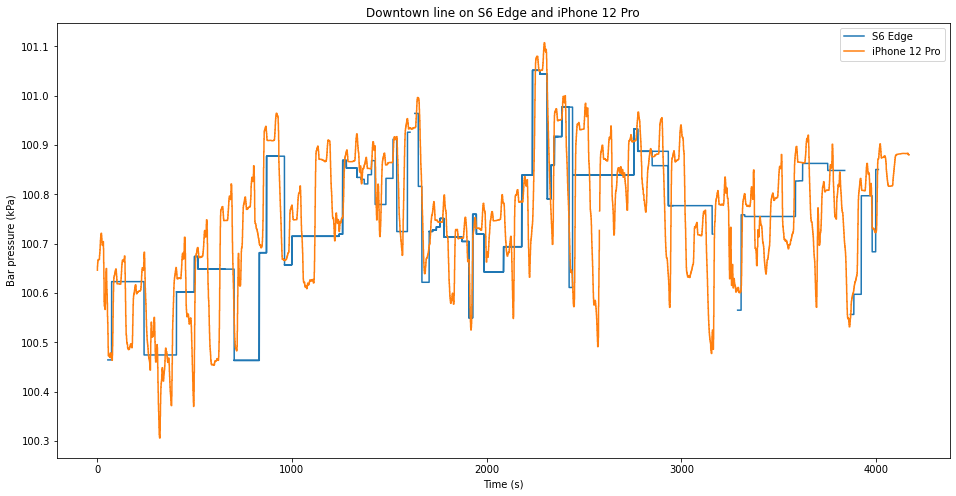

In [ ]:
visualisation(bukitPanjangToExpo_s6edge,bukitPanjangToExpo_iphone12pro,'Downtown line on S6 Edge and iPhone 12 Pro')

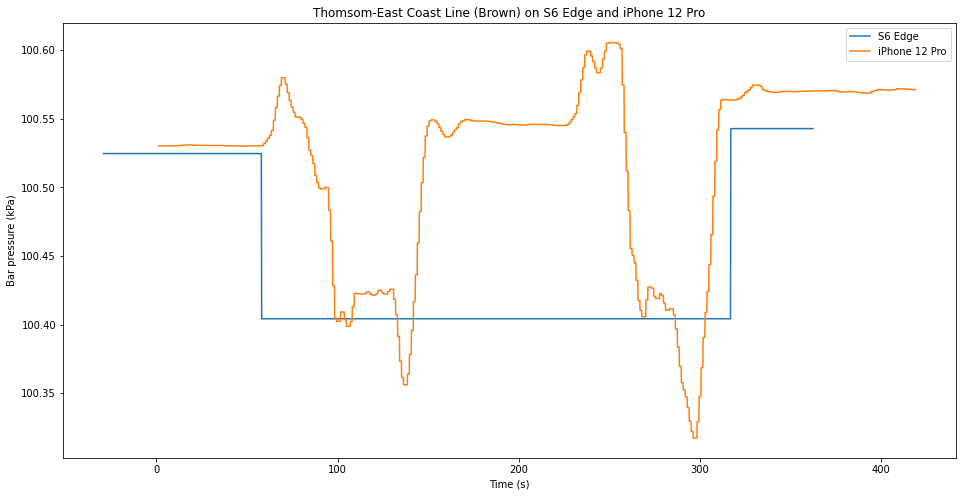

In [ ]:
visualisation(woodlandNorthToWoodlandSouth_s6edge,woodlandNorthToWoodlandSouth_iphone12pro,'Thomsom-East Coast Line (Brown) on S6 Edge and iPhone 12 Pro')

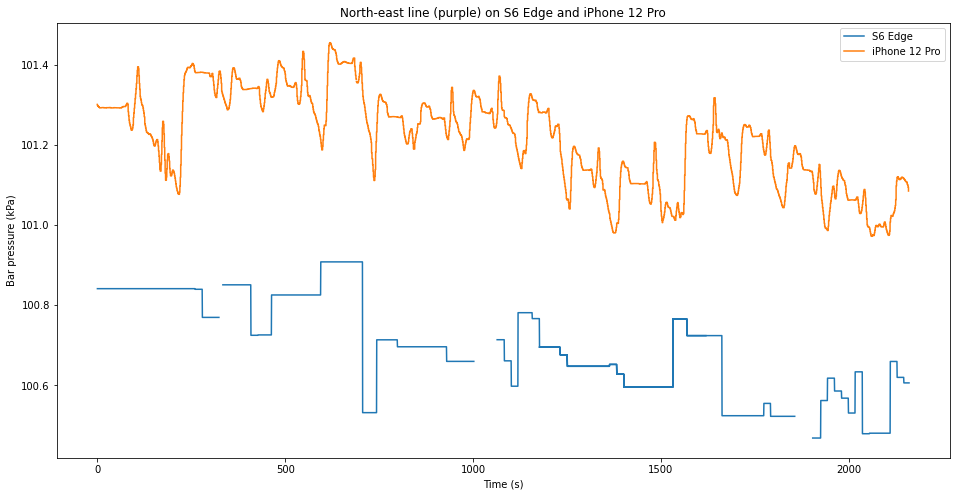

In [ ]:
visualisation(harbourFrontToPunggol_s6edge,harbourFrontToPunggol_iphone12pro,'North-east line (purple) on S6 Edge and iPhone 12 Pro')

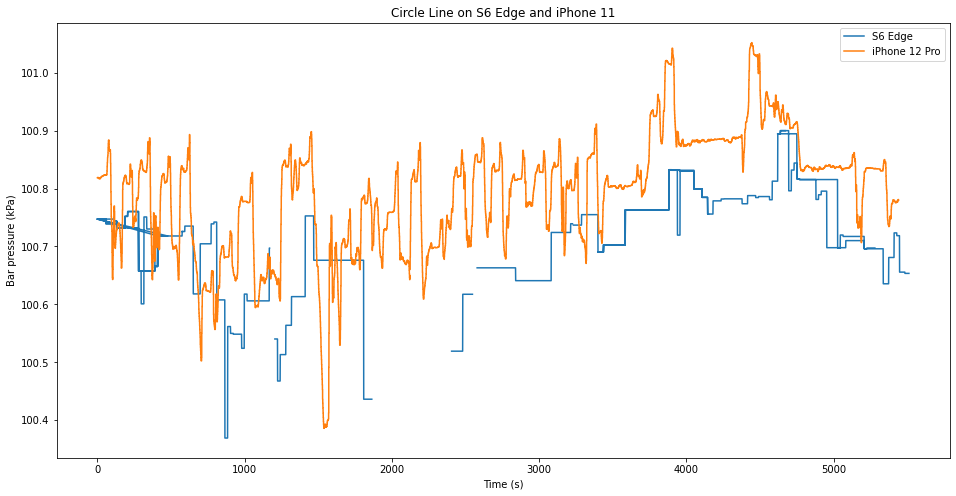

In [ ]:
visualisation(harbourfrontToDhobyGhautToMarinaBay_s6edge,harbourfrontToDhobyGhautToMarinaBay_iphone11,'Circle Line on S6 Edge and iPhone 11')

#Visualisation of all variables

In [ ]:
def totalvisualization(data):
    data_idle=data[~data.Mode.str.contains('MRT')]
    data_mrt=data[~data.Mode.str.contains('Idle')]
    plt.figure(figsize=(20,72))
    for i, col in enumerate(['Acc_Lin_X', 'Acc_Lin_Y', 'Acc_Lin_Z', 'Acc_X', 'Acc_Y','Acc_Z', 'Bar_Pressure', 'Gyr_X', 'Gyr_Y', 'Gyr_Z','Loc_Altitude', 'Loc_Latitude', 'Loc_Longitude', 'Mag_X', 'Mag_Y','Mag_Z'],start=1):
        plt.subplot(8,2,i)
        plt.plot(data_mrt['Cleaned_Time'],data_mrt[col],'.y',label='MRT')
        plt.plot(data_idle['Cleaned_Time'],data_idle[col],'.b',label='Idle')
        plt.legend()
        plt.xlabel('Time (s)')
        plt.title(col)
        #plt.show()

## Downtown Line

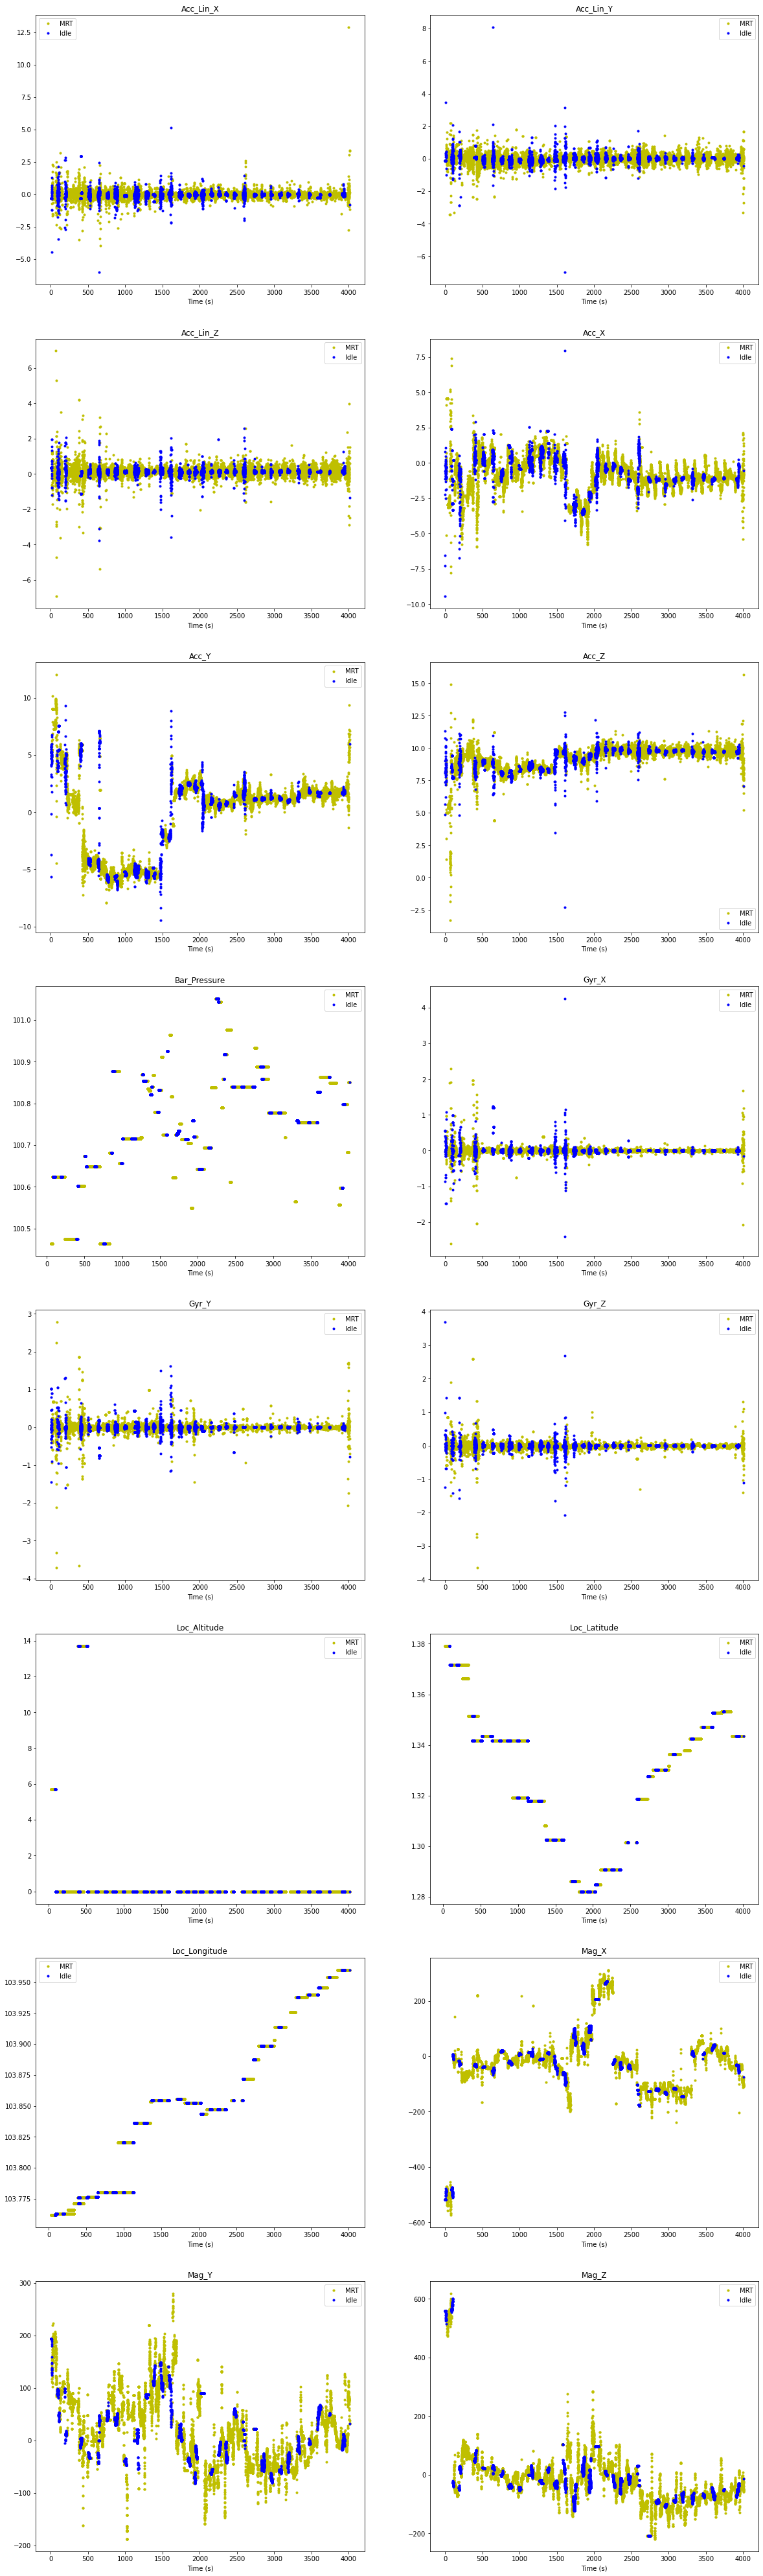

In [ ]:
totalvisualization(bukitPanjangToExpo_s6edge)

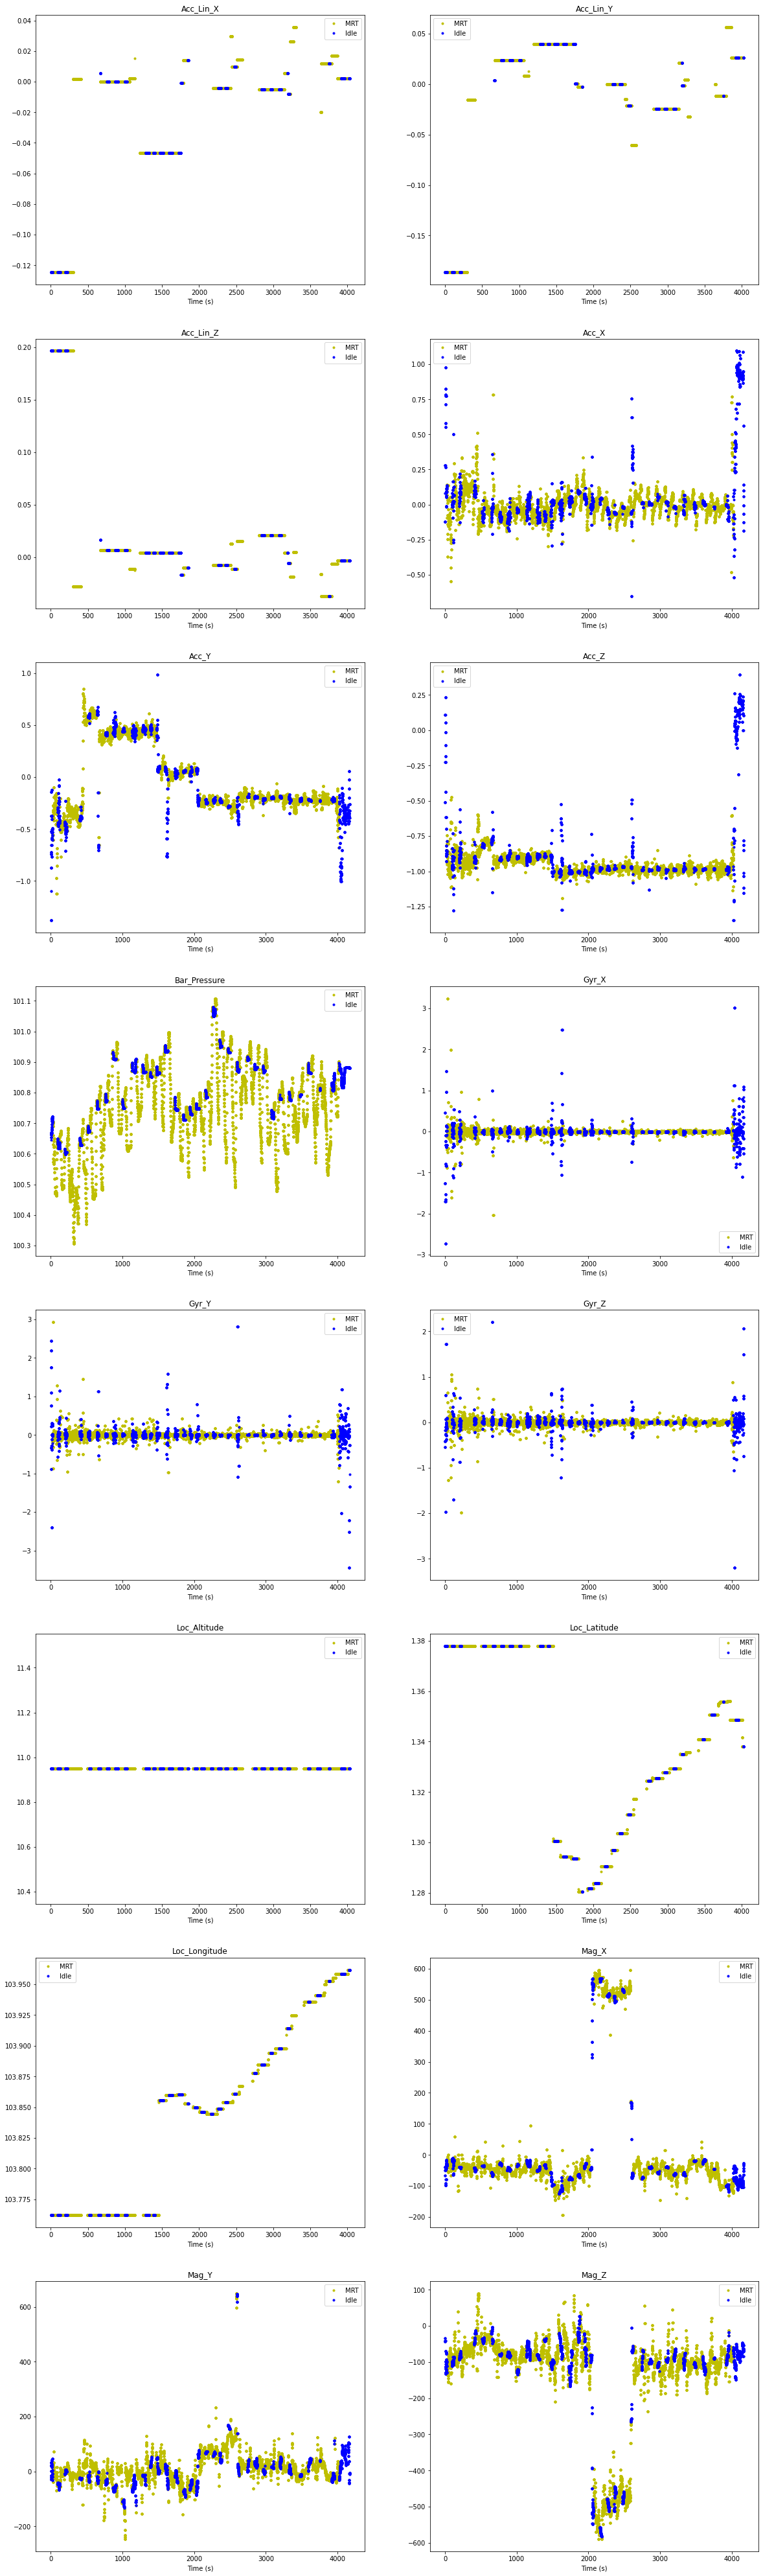

In [ ]:
totalvisualization(bukitPanjangToExpo_iphone12pro)

## Thomson-East Coast Line

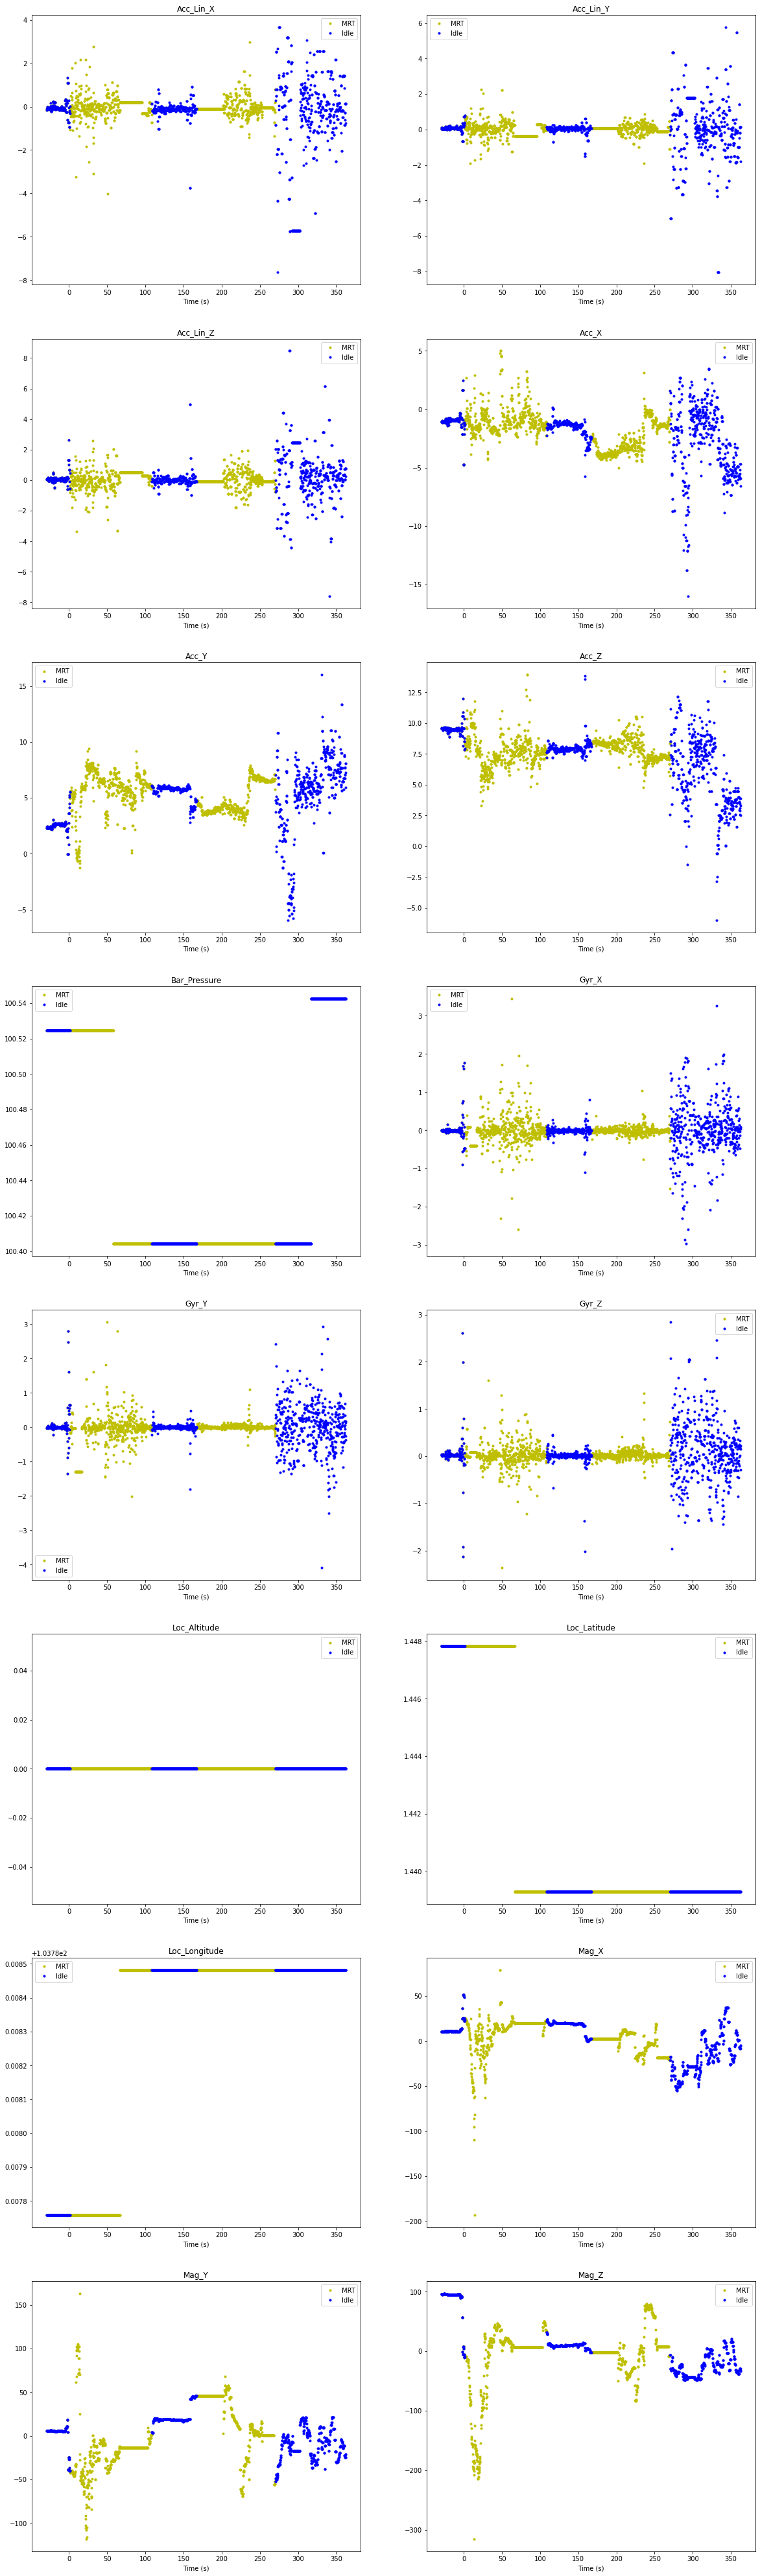

In [ ]:
totalvisualization(woodlandNorthToWoodlandSouth_s6edge)

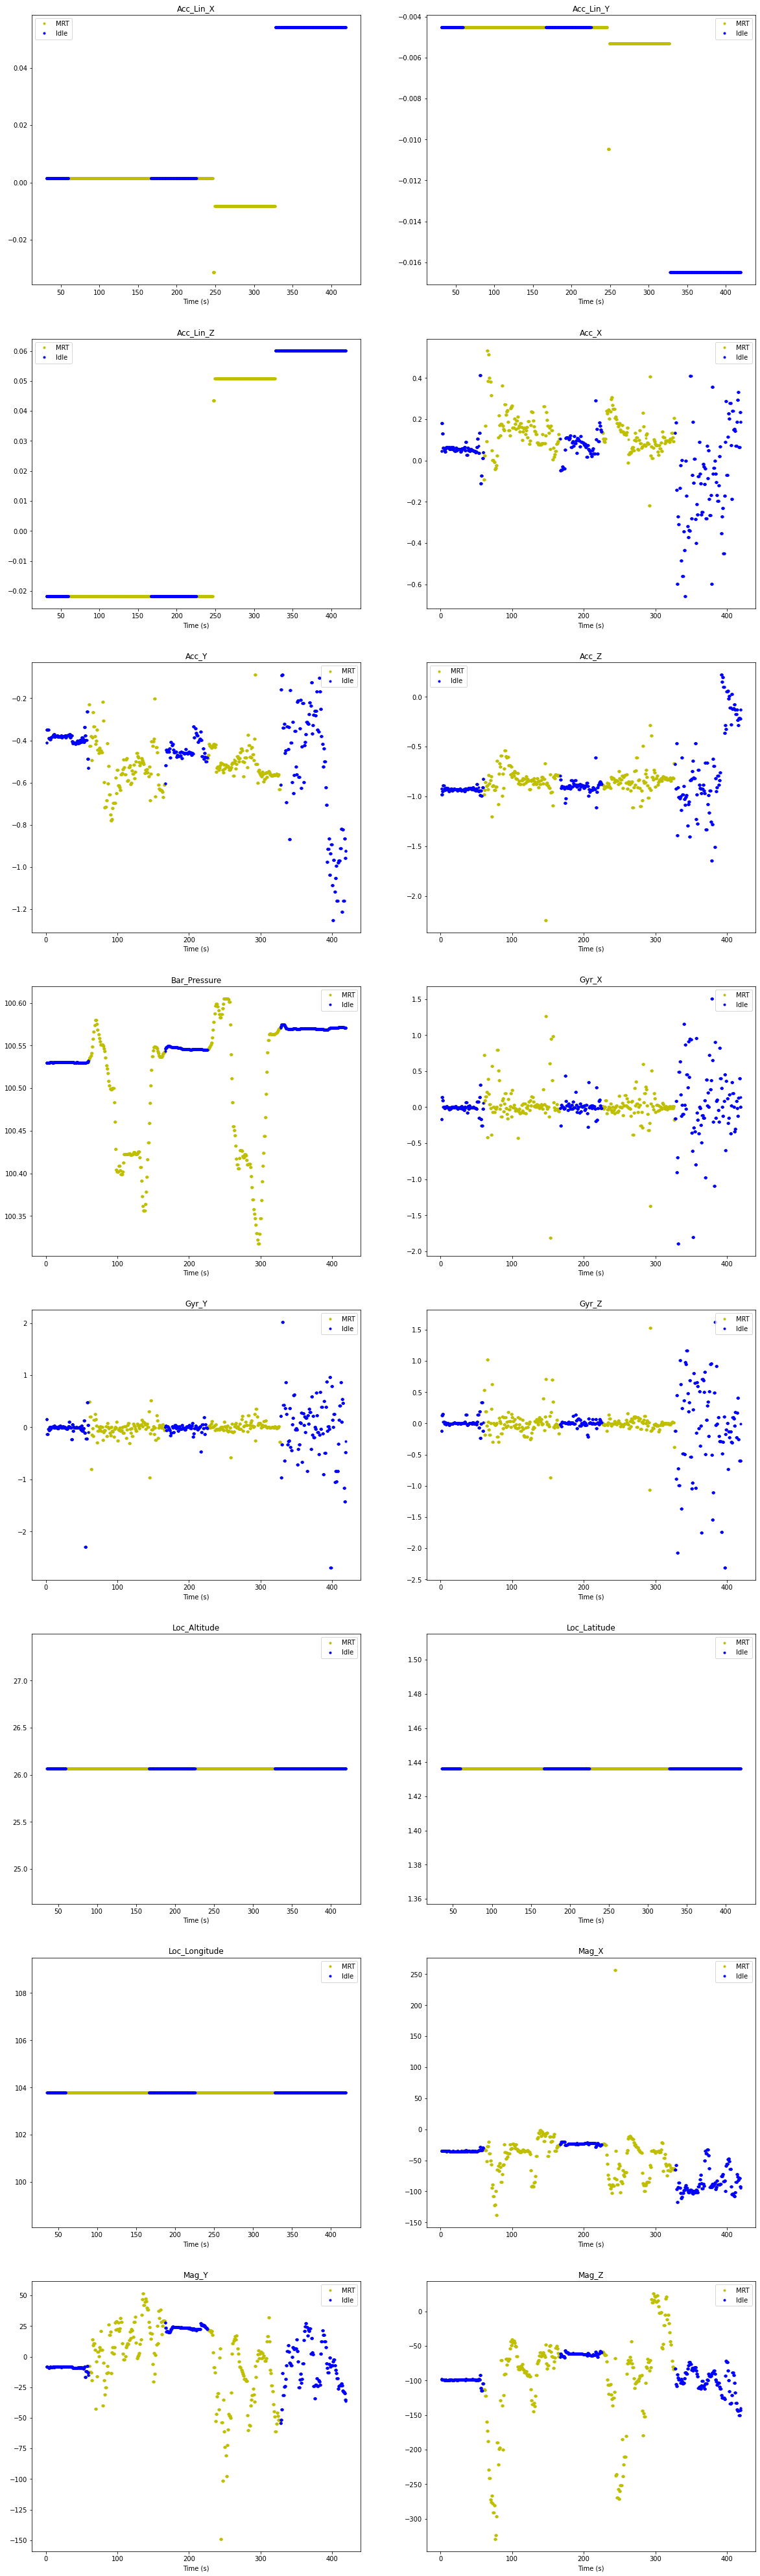

In [ ]:
totalvisualization(woodlandNorthToWoodlandSouth_iphone12pro)

## North-East Line

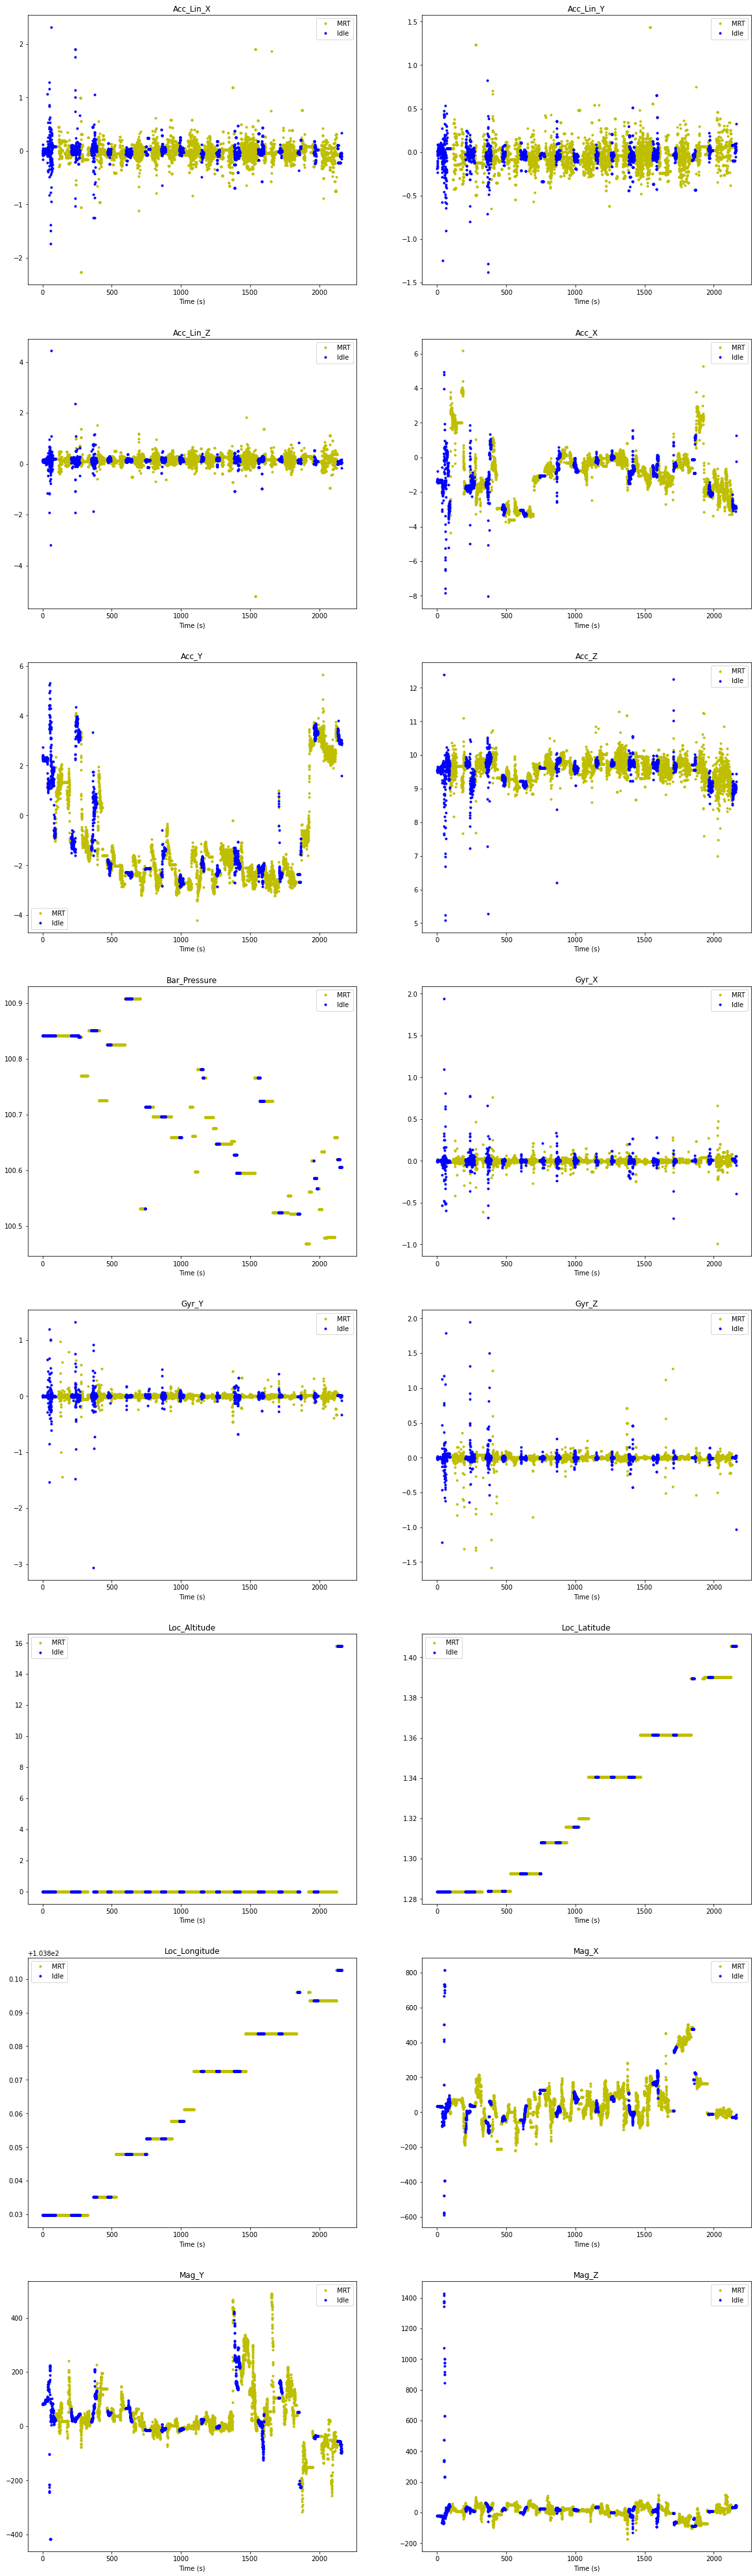

In [ ]:
totalvisualization(harbourFrontToPunggol_s6edge)

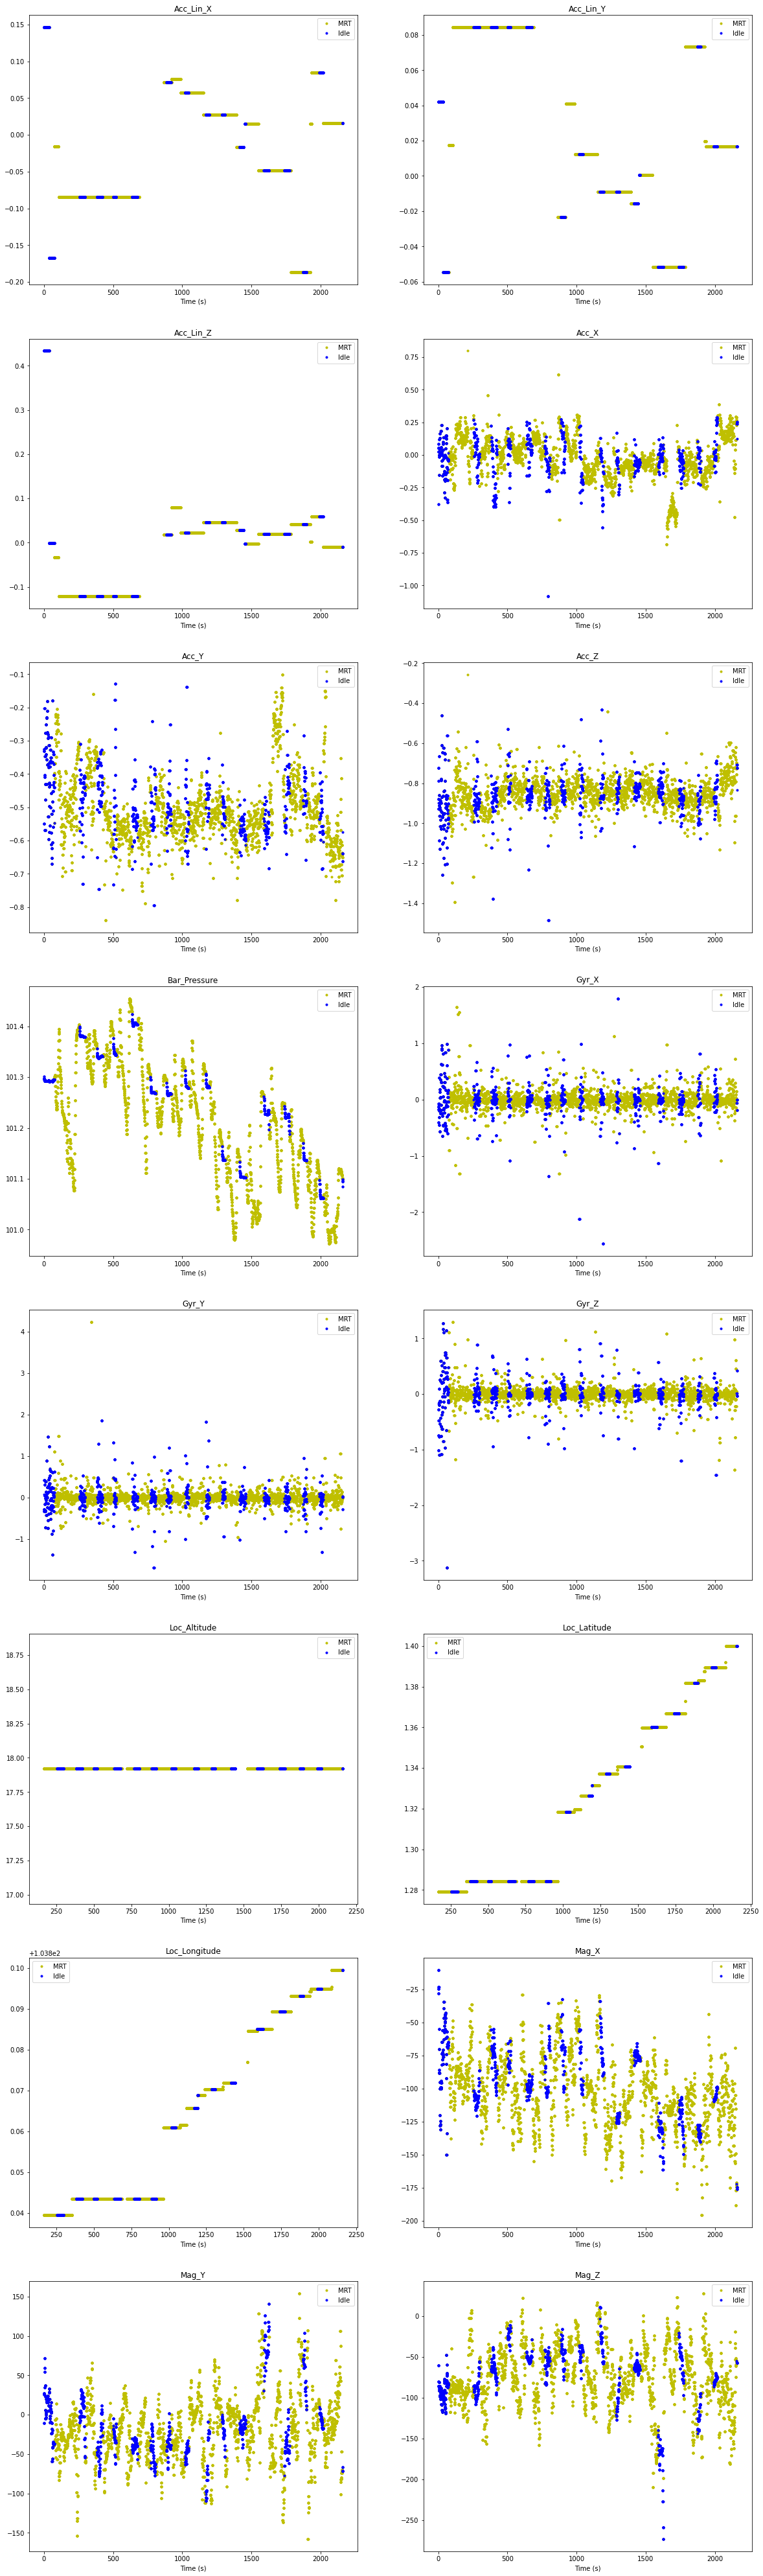

In [ ]:
totalvisualization(harbourFrontToPunggol_iphone12pro)

## Circle Line

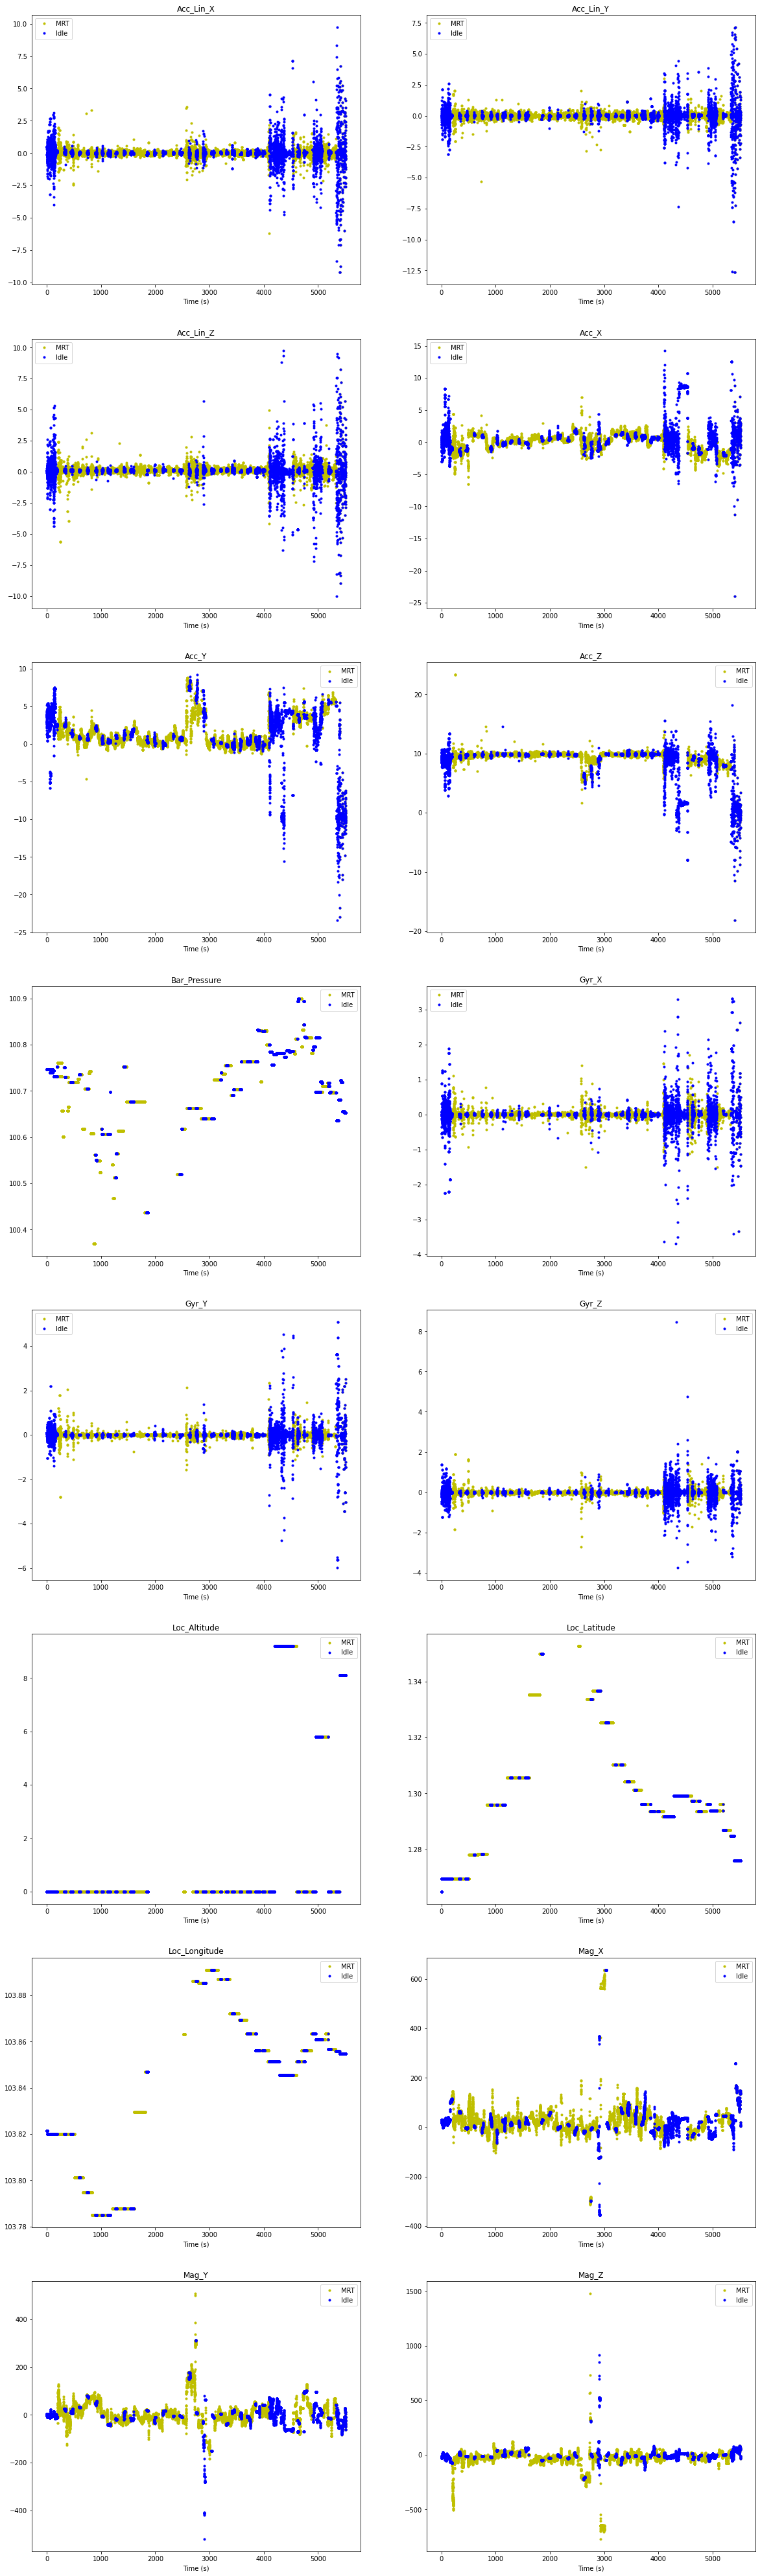

In [ ]:
totalvisualization(harbourfrontToDhobyGhautToMarinaBay_s6edge)

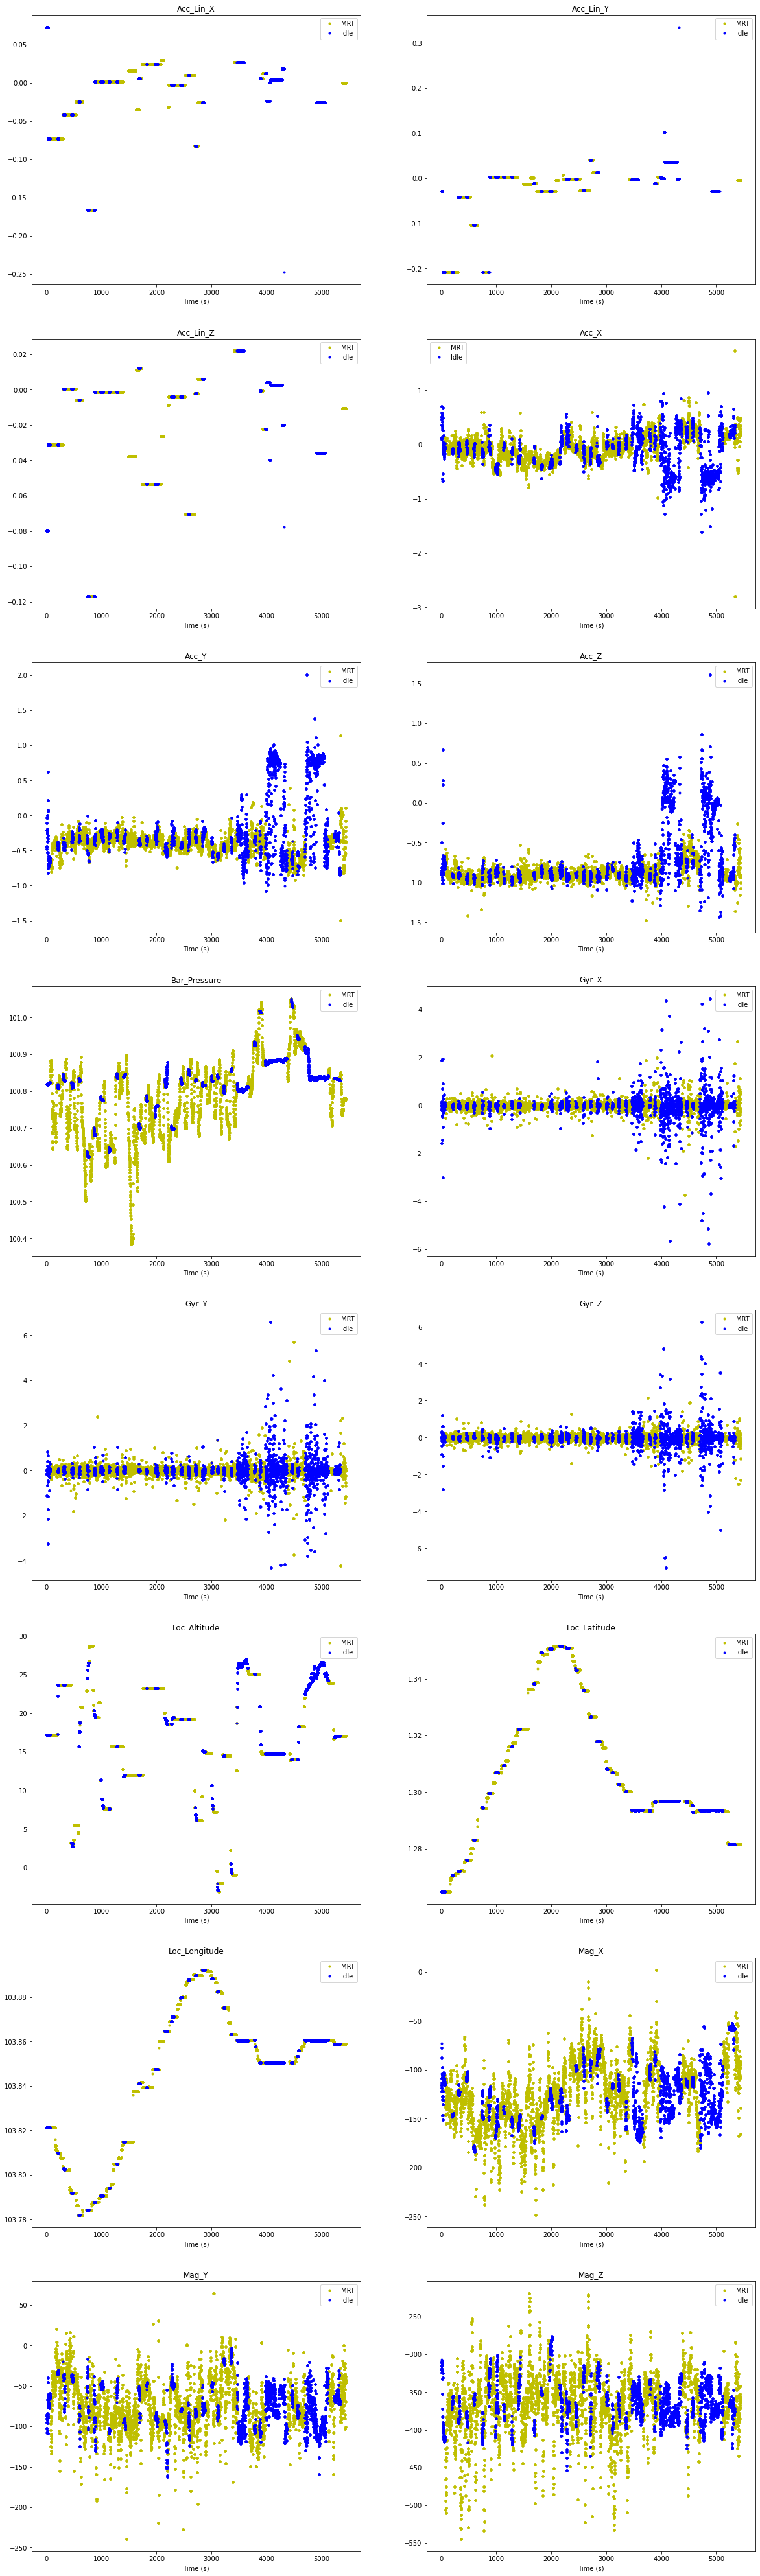

In [ ]:
totalvisualization(harbourfrontToDhobyGhautToMarinaBay_iphone11)

#Preparing data to build the model (Downtown line) + Appending stations

In [ ]:
DT_iphone12pro=bukitPanjangToExpo_iphone12pro
DT_s6edge=bukitPanjangToExpo_s6edge

## iPhone data

In [ ]:
DT_iphone12pro_temp = errorRemovingPipeline(DT_iphone12pro)
DT_iphone12pro_keyvalues = appendStation(DT_iphone12pro_temp,DT_Stations)
DT_iphone12pro = modifyColumnStation(DT_iphone12pro,DT_iphone12pro_keyvalues)

The length after modeChanged is : 67
The length after removeBackwardTimestampError is : 67
The length after first recalculated is : 67
The length after recalculated and repetitive mode removed is : 67
DT1_Bukit_Panjang
DT2_Cashew
DT3_Hillview
DT5_Beauty_World
DT6_King_Albert_Park
DT7_Sixth_Avenue
DT8_Tan_Kah_Kee
DT9_Botanic_Gardens
DT10_Stevens
DT11_Newton
DT12_Little_India
DT13_Rochor
DT14_Bugis
DT15_Promenade
DT16_Bayfront
DT17_Downtown
DT18_Telok Ayer
DT19_Chinatown
DT20_Fort_Canning
DT21_Bencoolen
DT22_Jalan_Besar
DT23_Bendemeer
DT24_Geylang_Bahru
DT25_Mattar
DT26_MacPherson
DT27_Ubi
DT28_Kaki_Bukit
DT29_Bedok_North
DT30_Bedok_Reservoir
DT31_Tampines_West
DT32_Tampines
DT33_Tempines_East
DT34_Upper_Changi
DT35_Expo
DT1_Bukit_Panjang is added!!!
Moving is added!!!
DT2_Cashew is added!!!
Moving is added!!!
DT3_Hillview is added!!!
Moving is added!!!
DT5_Beauty_World is added!!!
Moving is added!!!
DT6_King_Albert_Park is added!!!
Moving is added!!!
DT7_Sixth_Avenue is added!!!
Moving 

/content/LoadFunctions_old.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Station'][i] = modelist[0][4]


DT8_Tan_Kah_Kee is added!!!
Moving is added!!!
DT9_Botanic_Gardens is added!!!
Moving is added!!!
DT10_Stevens is added!!!
Moving is added!!!
DT11_Newton is added!!!
Moving is added!!!
DT12_Little_India is added!!!
Moving is added!!!
DT13_Rochor is added!!!
Moving is added!!!
DT14_Bugis is added!!!
Moving is added!!!
DT15_Promenade is added!!!
Moving is added!!!
DT16_Bayfront is added!!!
Moving is added!!!
DT17_Downtown is added!!!
Moving is added!!!
DT18_Telok Ayer is added!!!
Moving is added!!!
DT19_Chinatown is added!!!
Moving is added!!!
DT20_Fort_Canning is added!!!
Moving is added!!!
DT21_Bencoolen is added!!!
Moving is added!!!
DT22_Jalan_Besar is added!!!
Moving is added!!!
DT23_Bendemeer is added!!!
Moving is added!!!
DT24_Geylang_Bahru is added!!!
Moving is added!!!
DT25_Mattar is added!!!
Moving is added!!!
DT26_MacPherson is added!!!
Moving is added!!!
DT27_Ubi is added!!!
Moving is added!!!
DT28_Kaki_Bukit is added!!!
Moving is added!!!
DT29_Bedok_North is added!!!
Moving 

/content/LoadFunctions_old.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Station'][i] = temp


fill empty done!!!


In [ ]:
dropmoving=DT_iphone12pro.loc[DT_iphone12pro['Station']=='Moving']
DT_iphone12pro.drop(DT_iphone12pro.index[list(dropmoving.index)],inplace=True)

In [ ]:
DT_iphone12pro['Station'].value_counts()

DT35_Expo               675
DT11_Newton             243
DT16_Bayfront           201
DT15_Promenade          200
DT14_Bugis              198
DT19_Chinatown          194
DT12_Little_India       190
DT32_Tampines           190
DT26_MacPherson         189
DT9_Botanic_Gardens     186
DT34_Upper_Changi       183
DT18_Telok Ayer         145
DT28_Kaki_Bukit         137
DT21_Bencoolen          136
DT17_Downtown           134
DT2_Cashew              133
DT24_Geylang_Bahru      130
DT30_Bedok_Reservoir    122
DT29_Bedok_North        117
DT3_Hillview            116
DT6_King_Albert_Park    115
DT20_Fort_Canning       115
DT22_Jalan_Besar        115
DT1_Bukit_Panjang       114
DT23_Bendemeer          111
DT7_Sixth_Avenue        111
DT5_Beauty_World        111
DT27_Ubi                110
DT8_Tan_Kah_Kee         108
DT10_Stevens            105
DT25_Mattar             101
DT31_Tampines_West       94
DT13_Rochor              93
DT33_Tempines_East       30
Name: Station, dtype: int64

In [ ]:
features = ['Mode', 'Acc_Lin_X', 'Acc_Lin_Y', 'Acc_Lin_Z', 
            'Acc_X', 'Acc_Y', 'Acc_Z', 'Bar_Pressure', 
            'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z','Station']

MRT_data_iphone = [DT_iphone12pro[features]]

mrt_data_iphone = pd.concat(MRT_data_iphone)
mrt_data_iphone.reset_index(inplace=True)
mrt_data_iphone = mrt_data_iphone.drop('index', axis=1)

# Fill in 0 for all Null values EXCEPT locations columns (Loc_Altitude, Loc_Latitude, Loc_Longitude)
for i in features:
    mrt_data_iphone[i].fillna(0, inplace=True)

print(mrt_data_iphone['Mode'].unique())

['Idle' 'MRT']


In [ ]:
# Omit the 'Mode' column
mrt_data_features_iphone = mrt_data_iphone[[ 'Acc_Z', 'Bar_Pressure','Mag_X', 'Acc_Y', 'Mag_Z']]

# The ground truth
mrt_data_mode_iphone = mrt_data_iphone['Station']

# Normalize the feature values
mrt_data_features_normalized_iphone=(mrt_data_features_iphone-mrt_data_features_iphone.mean())/mrt_data_features_iphone.std()

In [ ]:
X_train_iphone, X_test_iphone, y_train_iphone, y_test_iphone = train_test_split(mrt_data_features_normalized_iphone, mrt_data_mode_iphone, test_size=0.3)

## S6 Edge data

In [ ]:
DT_s6edge_temp = errorRemovingPipeline(DT_s6edge)
DT_s6edge_keyvalues = appendStation(DT_s6edge_temp,DT_Stations)
DT_s6edge = modifyColumnStation(DT_s6edge,DT_s6edge_keyvalues)

The length after modeChanged is : 139
The length after removeBackwardTimestampError is : 71
The length after first recalculated is : 71
The length after recalculated and repetitive mode removed is : 67
DT1_Bukit_Panjang
DT2_Cashew
DT3_Hillview
DT5_Beauty_World
DT6_King_Albert_Park
DT7_Sixth_Avenue
DT8_Tan_Kah_Kee
DT9_Botanic_Gardens
DT10_Stevens
DT11_Newton
DT12_Little_India
DT13_Rochor
DT14_Bugis
DT15_Promenade
DT16_Bayfront
DT17_Downtown
DT18_Telok Ayer
DT19_Chinatown
DT20_Fort_Canning
DT21_Bencoolen
DT22_Jalan_Besar
DT23_Bendemeer
DT24_Geylang_Bahru
DT25_Mattar
DT26_MacPherson
DT27_Ubi
DT28_Kaki_Bukit
DT29_Bedok_North
DT30_Bedok_Reservoir
DT31_Tampines_West
DT32_Tampines
DT33_Tempines_East
DT34_Upper_Changi
DT35_Expo
DT1_Bukit_Panjang is added!!!
Moving is added!!!
DT2_Cashew is added!!!
Moving is added!!!
DT3_Hillview is added!!!
Moving is added!!!
DT5_Beauty_World is added!!!
Moving is added!!!
DT6_King_Albert_Park is added!!!
Moving is added!!!
DT7_Sixth_Avenue is added!!!
Moving

/content/LoadFunctions_old.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Station'][i] = modelist[0][4]


DT9_Botanic_Gardens is added!!!
Moving is added!!!
DT10_Stevens is added!!!
Moving is added!!!
DT11_Newton is added!!!
Moving is added!!!
DT12_Little_India is added!!!
Moving is added!!!
DT13_Rochor is added!!!
Moving is added!!!
DT14_Bugis is added!!!
Moving is added!!!
DT15_Promenade is added!!!
Moving is added!!!
DT16_Bayfront is added!!!
Moving is added!!!
DT17_Downtown is added!!!
Moving is added!!!
DT18_Telok Ayer is added!!!
Moving is added!!!
DT19_Chinatown is added!!!
Moving is added!!!
DT20_Fort_Canning is added!!!
Moving is added!!!
DT21_Bencoolen is added!!!
Moving is added!!!
DT22_Jalan_Besar is added!!!
Moving is added!!!
DT23_Bendemeer is added!!!
Moving is added!!!
DT24_Geylang_Bahru is added!!!
Moving is added!!!
DT25_Mattar is added!!!
Moving is added!!!
DT26_MacPherson is added!!!
Moving is added!!!
DT27_Ubi is added!!!
Moving is added!!!
DT28_Kaki_Bukit is added!!!
Moving is added!!!
DT29_Bedok_North is added!!!
Moving is added!!!
DT30_Bedok_Reservoir is added!!!
Mo

/content/LoadFunctions_old.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Station'][i] = temp


fill empty done!!!


In [ ]:
dropmoving=DT_s6edge.loc[DT_s6edge['Station']=='Moving']
DT_s6edge.drop(DT_s6edge.index[list(dropmoving.index)],inplace=True)

In [ ]:
DT_s6edge['Station'].value_counts()

DT27_Ubi                1712
DT7_Sixth_Avenue        1409
DT22_Jalan_Besar         437
DT11_Newton              184
DT16_Bayfront            147
DT32_Tampines            144
DT15_Promenade           143
DT9_Botanic_Gardens      137
DT19_Chinatown           134
DT14_Bugis               134
DT26_MacPherson          133
DT12_Little_India        133
DT34_Upper_Changi        127
DT18_Telok Ayer          107
DT17_Downtown             97
DT28_Kaki_Bukit           96
DT24_Geylang_Bahru        93
DT21_Bencoolen            90
DT29_Bedok_North          90
DT2_Cashew                90
DT5_Beauty_World          87
DT6_King_Albert_Park      86
DT30_Bedok_Reservoir      84
DT3_Hillview              84
DT23_Bendemeer            83
DT20_Fort_Canning         83
DT10_Stevens              80
DT8_Tan_Kah_Kee           77
DT13_Rochor               76
DT25_Mattar               73
DT31_Tampines_West        63
DT1_Bukit_Panjang         44
DT33_Tempines_East        20
DT35_Expo                  4
Name: Station,

In [ ]:
features = ['Mode', 'Acc_Lin_X', 'Acc_Lin_Y', 'Acc_Lin_Z', 
            'Acc_X', 'Acc_Y', 'Acc_Z', 'Bar_Pressure', 
            'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z','Station']

MRT_data = [DT_s6edge[features]]

mrt_data = pd.concat(MRT_data)
mrt_data.reset_index(inplace=True)
mrt_data = mrt_data.drop('index', axis=1)

# Fill in 0 for all Null values EXCEPT locations columns (Loc_Altitude, Loc_Latitude, Loc_Longitude)
for i in features:
    mrt_data[i].fillna(0, inplace=True)

# Find out the null values inside the dataframe
#to_drop_walking = mrt_data.loc[mrt_data['Mode'] == 'Walking']
#to_drop_pmd = mrt_data.loc[mrt_data['Mode'] == 'PMD']
#mrt_data.drop(mrt_data.index[list(to_drop_walking.index)], inplace = True)
#mrt_data.drop(mrt_data.index[list(to_drop_pmd.index)], inplace = True)

print(mrt_data['Mode'].unique())

['Idle' 'MRT']


In [ ]:
mrt_data_features = mrt_data[[ 'Acc_Z', 'Bar_Pressure','Mag_X', 'Acc_Y', 'Mag_Z']]

# The ground truth
mrt_data_mode = mrt_data['Station']

# Normalize the feature values
mrt_data_features_normalized=(mrt_data_features-mrt_data_features.mean())/mrt_data_features.std()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mrt_data_features_normalized, mrt_data_mode, test_size=0.3)

#Travel Mode Prediction#

### Random Forest ###

####Feature Importance Ranking####

In [ ]:
# Omit the 'Mode' column
mrt_data_features = mrt_data_iphone[[ 'Acc_X', 'Acc_Y', 'Acc_Z', 'Bar_Pressure', 
                              'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z']]

# The ground truth
mrt_data_mode = mrt_data_iphone['Mode']

# Normalize the feature values
mrt_data_features_normalized=(mrt_data_features-mrt_data_features.mean())/mrt_data_features.std()

# Split the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(mrt_data_features_normalized, mrt_data_mode, test_size=0.3)

RFC    = RandomForestClassifier(n_estimators=10, max_depth=50)

RFC.fit(X_train, y_train)

rfc_predict  = RFC.predict(X_test)

# Confusion matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[1575    0]
 [   1    0]]


=== Classification Report ===
              precision    recall  f1-score   support

        Idle       1.00      1.00      1.00      1575
         MRT       0.00      0.00      0.00         1

    accuracy                           1.00      1576
   macro avg       0.50      0.50      0.50      1576
weighted avg       1.00      1.00      1.00      1576





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


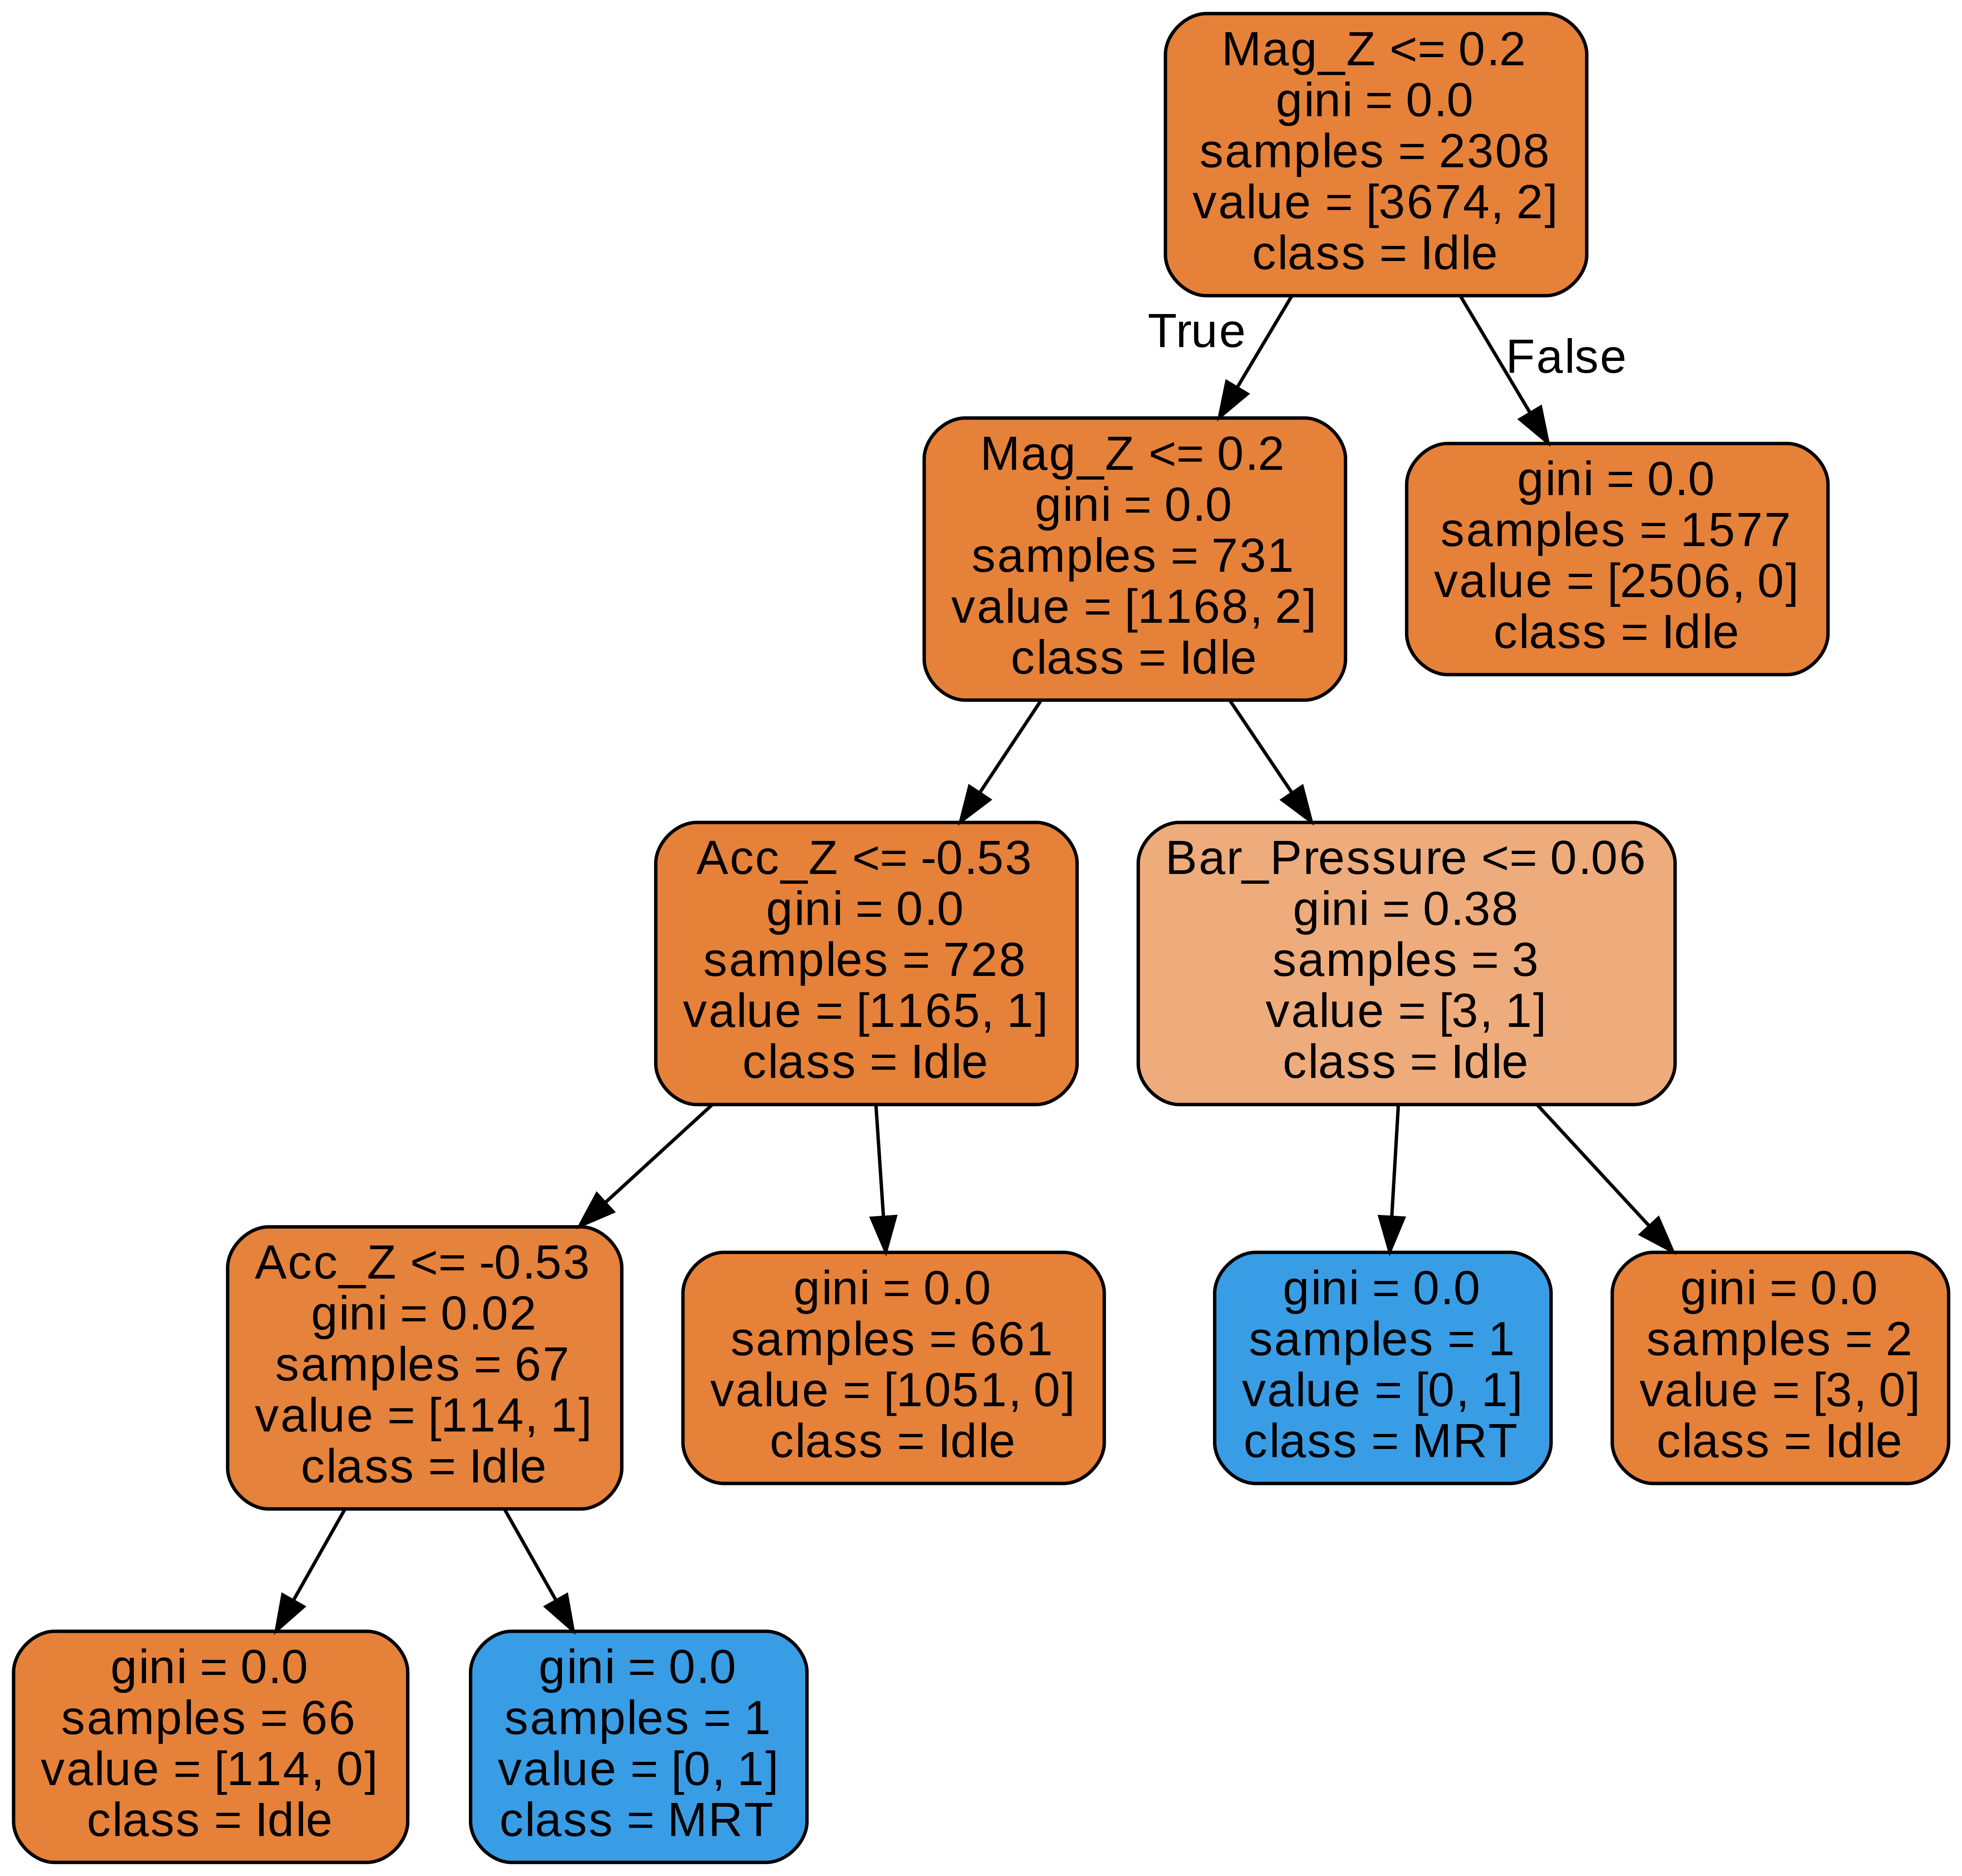

In [ ]:
# Plots the Feature Importance Tree #

estimator = RFC.estimators_[1]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = list(mrt_data_features.columns),
                class_names = mrt_data['Mode'].unique(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

#### Permutation Matrix and Feature Selection####


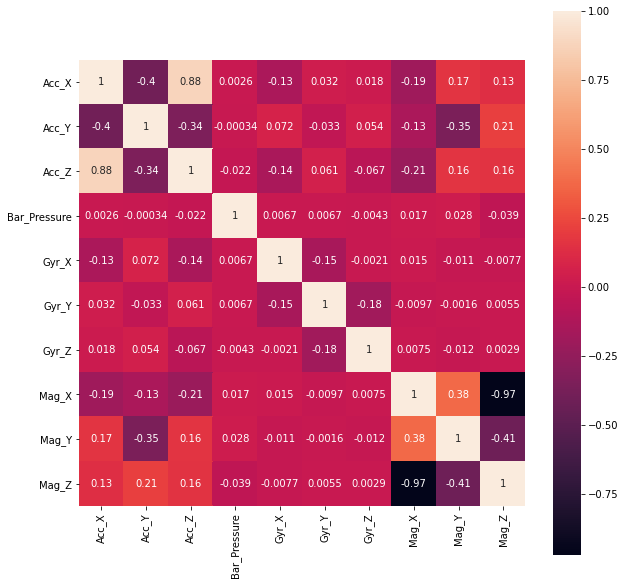

In [ ]:
#Correlation Matrix#

corr_data = mrt_data_features.corr()
f, ax = plt.subplots(figsize=(10, 10))
ax = sb.heatmap(corr_data, square=True, annot=True)

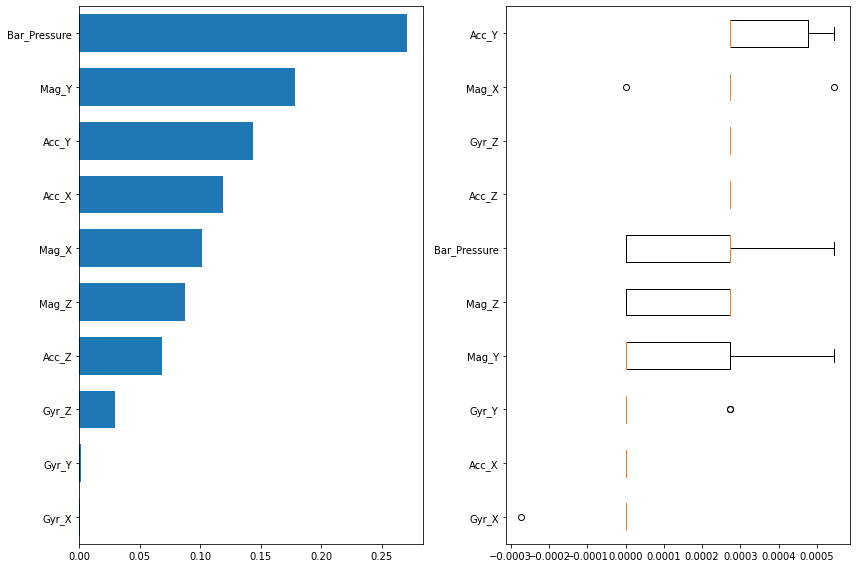

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(RFC, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(RFC.feature_importances_)
tree_indices = np.arange(0, len(RFC.feature_importances_)) + 0.5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.barh(tree_indices,
         RFC.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(np.array(mrt_data_features.columns)[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(RFC.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=np.array(mrt_data_features.columns)[perm_sorted_idx])
fig.tight_layout()
plt.show()

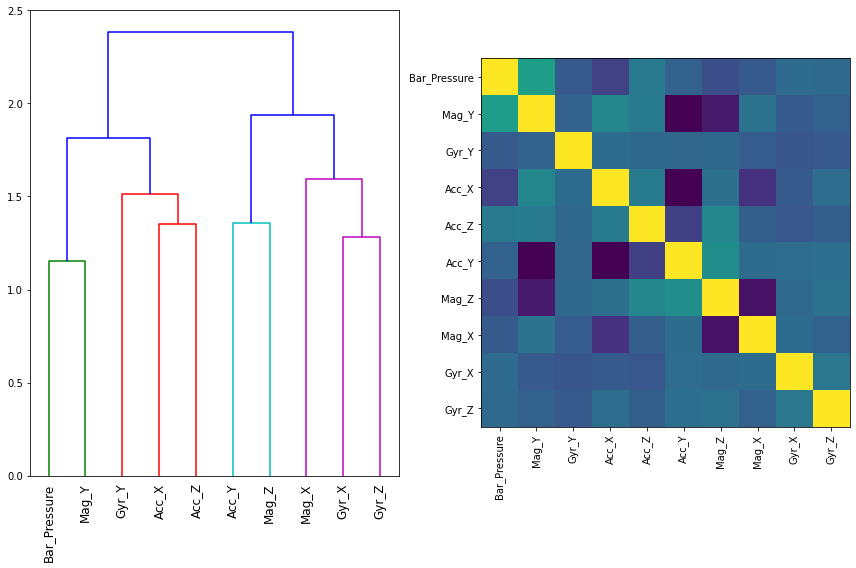

In [ ]:
# Dendrogram to denote feature importance through permutation matrix

from scipy.stats import spearmanr
from scipy.cluster import hierarchy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(mrt_data_features).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=mrt_data_features.columns, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [ ]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

clf_sel = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sel.fit(X_train_sel, y_train)
print("Accuracy on test data with features removed: {:.2f}".format(
      clf_sel.score(X_test_sel, y_test)))

Accuracy on test data with features removed: 1.00


In [ ]:
print(selected_features)
print(mrt_data_features.columns[selected_features])
print(mrt_data_features[mrt_data_features.columns[selected_features]])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Index(['Acc_X', 'Acc_Y', 'Acc_Z', 'Bar_Pressure', 'Gyr_X', 'Gyr_Y', 'Gyr_Z',
       'Mag_X', 'Mag_Y', 'Mag_Z'],
      dtype='object')
         Acc_X     Acc_Y     Acc_Z  ...      Mag_X      Mag_Y      Mag_Z
0     0.082443 -1.094711 -0.225204  ... -66.960739  32.955582 -33.212799
1     0.082443 -1.094711 -0.225204  ... -66.960739  32.955582 -33.212799
2    -0.119461 -1.375961 -0.512390  ... -66.960739  32.955582 -33.212799
3    -0.119461 -1.375961 -0.512390  ... -40.024292  32.333542 -42.347885
4    -0.119461 -1.375961 -0.512390  ... -40.024292  32.333542 -42.347885
...        ...       ...       ...  ...        ...        ...        ...
5247 -0.128662 -0.259262 -1.115417  ... -27.539230  -5.333939 -70.106552
5248 -0.128662 -0.259262 -1.115417  ... -27.539230  -5.333939 -70.106552
5249  0.059464 -0.322006 -1.012543  ... -27.539230  -5.333939 -70.106552
5250  0.059464 -0.322006 -1.012543  ... -34.358887 -10.422653 -61.860901
5251  0.059464 -0.322006 -1.0125

#### K-Fold Cross Validation & GridSearchCV ####

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, n_splits=5)

accuracy_kfold = cross_val_score(RFC, mrt_data_features[mrt_data_features.columns[selected_features]], mrt_data_mode, cv=kf, scoring='accuracy')
macro_avg_kfold = cross_val_score(RFC, mrt_data_features[mrt_data_features.columns[selected_features]], mrt_data_mode, cv=kf, scoring='f1_macro')
weight_avg_kfold = cross_val_score(RFC, mrt_data_features[mrt_data_features.columns[selected_features]], mrt_data_mode, cv=kf, scoring='f1_weighted')

In [ ]:
print("The Accuracy of the 5-fold cross validation are            :" + str(accuracy_kfold))
print("The F1 Macro Average of the 5-fold cross validation are    :" + str(macro_avg_kfold))
print("The F1 Weighted Average of the 5-fold cross validation are :" + str(weight_avg_kfold))

The Accuracy of the 5-fold cross validation are            :[1.         0.99904853 0.99714286 0.99714286 0.99904762]
The F1 Macro Average of the 5-fold cross validation are    :[0.49952381 0.49976202 0.49976179 1.         0.4990458 ]
The F1 Weighted Average of the 5-fold cross validation are :[0.99904762 0.99714648 1.         0.99857166 0.99714377]


In [ ]:
param_grid = {
    'max_depth': [20, 30, 40, 50],
    'n_estimators': [10, 20, 30, 40, 50]
}

rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train_sel, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] max_depth=20, n_estimators=10 ...................................
[CV] .................... max_depth=20, n_estimators=10, total=   0.0s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] .................... max_depth=20, n_estimators=10, total=   0.0s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] .................... max_depth=20, n_estimators=10, total=   0.0s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] .................... max_depth=20, n_estimators=10, total=   0.0s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] .................... max_depth=20, n_estimators=10, total=   0.0s
[CV] max_depth=20, n_estimators=20 ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... max_depth=20, n_estimators=20, total=   0.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .................... max_depth=20, n_estimators=20, total=   0.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .................... max_depth=20, n_estimators=20, total=   0.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .................... max_depth=20, n_estimators=20, total=   0.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .................... max_depth=20, n_estimators=20, total=   0.1s
[CV] max_depth=20, n_estimators=30 ...................................
[CV] .................... max_depth=20, n_estimators=30, total=   0.1s
[CV] max_depth=20, n_estimators=30 ...................................
[CV] .................... max_depth=20, n_estimators=30, total=   0.1s
[CV] max_depth=20, n_estimators=30 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
best_grid = grid_search.best_estimator_
best_score = grid_search.best_score_
print(best_grid)
print()
print(best_score)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.9989119343389531


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

grid_accuracy = evaluate(best_grid, X_test, y_test)


TypeError: ignored

#### Model Running ####

In [ ]:
# We create a function that automatically trains the data using the input as the selected features
def random_forest(features):
  features_list = features.split(', ')
  
  global mrt_data
  mrt_data_features = mrt_data[features_list]
  mrt_data_mode = mrt_data['Mode']
  mrt_data_features_normalized=(mrt_data_features-mrt_data_features.mean())/mrt_data_features.std()

  # Split the data to train and test sets, 57846 for train, 14462 for test
  X_train, X_test, y_train, y_test = train_test_split(mrt_data_features_normalized, mrt_data_mode, test_size=0.3)

  RFC    = RandomForestClassifier()
  RFC.fit(X_train, y_train)

  rfc_predict  = RFC.predict(X_test)

  # Confusion matrix
  print("=== Confusion Matrix of " + str(features) + " ===")
  print(confusion_matrix(y_test, rfc_predict))
  print('\n')

  # Classification Report
  print("=== Classification Report of " + str(features) + " ===")
  print(classification_report(y_test, rfc_predict))
  print('\n')
  print('\n')

In [ ]:
random_forest('Bar_Pressure')
random_forest('Acc_Z')
random_forest('Gyr_Z')
random_forest('Mag_Z')

#Direct Prediction

##Use iphone to train the model, test on iphone

In [ ]:
RFC    = RandomForestClassifier(n_estimators=10, max_depth=50)

In [ ]:
RFC.fit(X_train_iphone, y_train_iphone)

rfc_predict  = RFC.predict(X_test_iphone)

# Confusion matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_iphone, rfc_predict))
print('\n')

# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test_iphone, rfc_predict))
print('\n')

##Use iphone to train model, test on s6edge

In [ ]:
rfc_predict  = RFC.predict(X_test)

# Confusion matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

##Use s6edge to train the model, test on s6edge

In [ ]:
RFC.fit(X_train, y_train)

rfc_predict  = RFC.predict(X_test)

# Confusion matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

##Use s6edge to train the model, test on iphone

In [ ]:
rfc_predict  = RFC.predict(X_test_iphone)

# Confusion matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_iphone, rfc_predict))
print('\n')

# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test_iphone, rfc_predict))
print('\n')

# Silhouette Scores
The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [ ]:
features = ['Mode', 'Acc_Lin_X', 'Acc_Lin_Y', 'Acc_Lin_Z', 
            'Acc_X', 'Acc_Y', 'Acc_Z', 'Bar_Pressure', 
            'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z','Station']

MRT_data_iphone = [DT_iphone12pro[features]]

mrt_data_iphone = pd.concat(MRT_data_iphone)
mrt_data_iphone.reset_index(inplace=True)
mrt_data_iphone = mrt_data_iphone.drop('index', axis=1)

MRT_data_s6edge = [DT_s6edge[features]]

mrt_data_s6edge = pd.concat(MRT_data_s6edge)
mrt_data_s6edge.reset_index(inplace=True)
mrt_data_s6edge = mrt_data_s6edge.drop('index', axis=1)
for i in features:
    mrt_data_iphone[i].fillna(0, inplace=True) #can try fill with mean?
    mrt_data_s6edge[i].fillna(0, inplace=True)

mrt_data_features_iphone = mrt_data_iphone[[ 'Acc_Lin_X', 'Acc_Lin_Y', 'Acc_Lin_Z', 
            'Acc_X', 'Acc_Y', 'Acc_Z', 'Bar_Pressure', 
            'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z']]
mrt_data_features_s6edge = mrt_data_s6edge[[ 'Acc_Lin_X', 'Acc_Lin_Y', 'Acc_Lin_Z', 
            'Acc_X', 'Acc_Y', 'Acc_Z', 'Bar_Pressure', 
            'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z']]
combined_data=pd.concat([mrt_data_features_iphone,mrt_data_features_s6edge])
mrt_data_combined=pd.concat([DT_iphone12pro,DT_s6edge])

In [ ]:
from sklearn.preprocessing import StandardScaler
# standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1   ...            11            12
count  1.183300e+04  1.183300e+04  ...  1.183300e+04  1.183300e+04
mean   1.632918e-16  6.725702e-16  ... -8.403843e-16 -2.334837e-15
std    1.000042e+00  1.000042e+00  ...  1.000042e+00  1.000042e+00
min   -2.478594e+01 -3.360141e+01  ... -2.625266e+00 -3.998454e+00
25%   -1.123431e-01 -1.216981e-01  ... -6.253298e-01 -2.213712e-01
50%    6.774204e-02 -4.341977e-03  ... -1.134797e-01 -3.023296e-03
75%    8.055717e-02  1.850429e-01  ...  4.596400e-01  4.352211e-01
max    2.126355e+01  3.888485e+01  ...  1.000787e+01  5.162996e+00

[8 rows x 13 columns]

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans

In [ ]:
def silhouetteAnalysis(data):
  '''get silhouette scores to know the number of clusters to be used'''
  '''used only the dataset with numerical variables as input parameter'''
  range_n_clusters = [2, 3, 4, 5, 6]
  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, random_state=10)
      cluster_labels = clusterer.fit_predict(data)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(data, cluster_labels)
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(data, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                  c="white", alpha=1, s=200, edgecolor='k')

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                      s=50, edgecolor='k')

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

  plt.show()

In [ ]:
mrt_data_combined_features = mrt_data_combined[[ 'Acc_X', 'Acc_Y', 'Acc_Z', 'Bar_Pressure', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z']]
mrt_data_combined_features

features2 = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Bar_Pressure', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z']

for i in features2:
    mrt_data_combined_features[i].fillna(0, inplace=True)

mrt_data_combined_features

#next step has to be array and no NaN

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Acc_X     Acc_Y     Acc_Z  ...      Mag_X      Mag_Y      Mag_Z
0      0.082443 -1.094711 -0.225204  ... -66.960739  32.955582 -33.212799
1      0.082443 -1.094711 -0.225204  ... -66.960739  32.955582 -33.212799
2     -0.119461 -1.375961 -0.512390  ... -66.960739  32.955582 -33.212799
3     -0.119461 -1.375961 -0.512390  ... -40.024292  32.333542 -42.347885
4     -0.119461 -1.375961 -0.512390  ... -40.024292  32.333542 -42.347885
...         ...       ...       ...  ...        ...        ...        ...
20824 -0.281319  1.825579  9.688137  ... -55.800000   0.300000 -36.700000
21041 -1.266533  7.078457  6.523003  ... -83.600000  33.500000 -11.800000
21042  1.228225  6.795941  8.358158  ... -77.200005  31.200000 -13.900001
21043  0.280122  5.671864  8.525752  ... -76.700005  31.900000 -13.700000
21044 -0.545878  5.972336  7.072472  ... -75.300000  31.500000 -12.900001

[11833 rows x 10 columns]

For n_clusters = 2 The average silhouette_score is : 0.8112137764936502
For n_clusters = 3 The average silhouette_score is : 0.8183743291489722
For n_clusters = 4 The average silhouette_score is : 0.3359873707247611
For n_clusters = 5 The average silhouette_score is : 0.34429225915371847
For n_clusters = 6 The average silhouette_score is : 0.29354085279781783


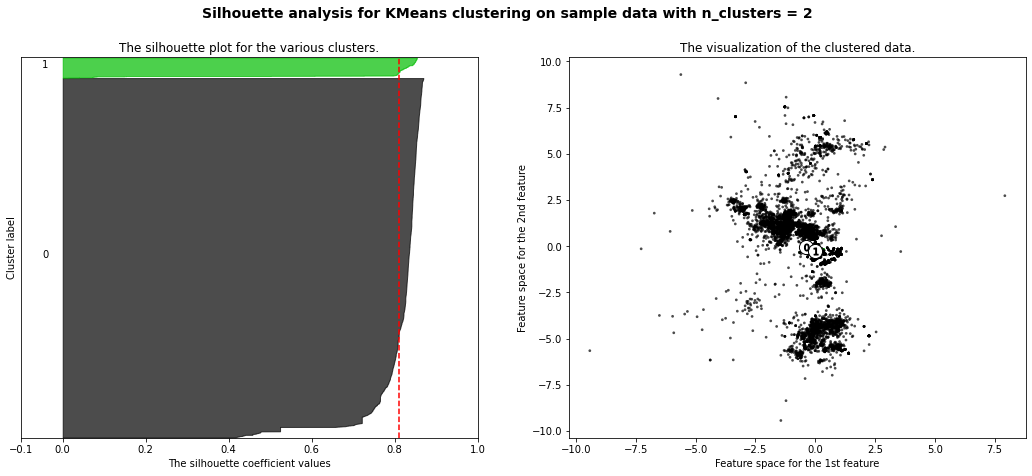

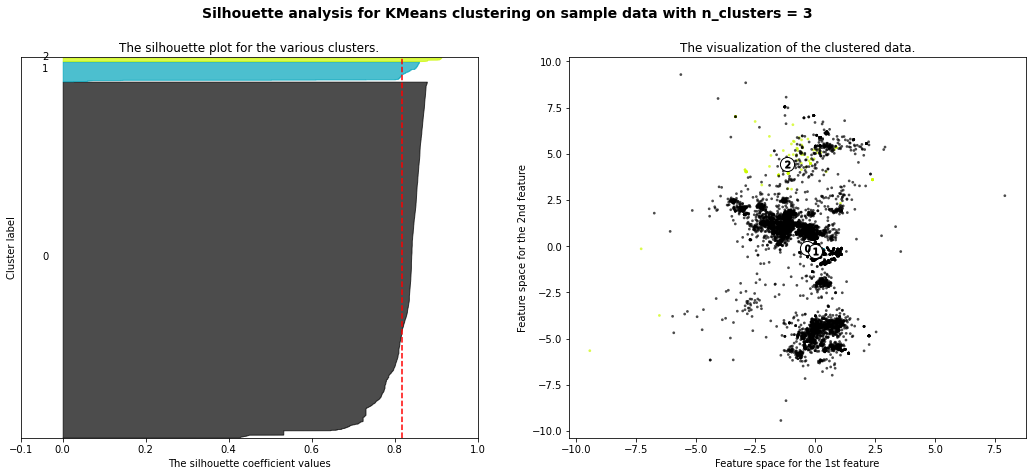

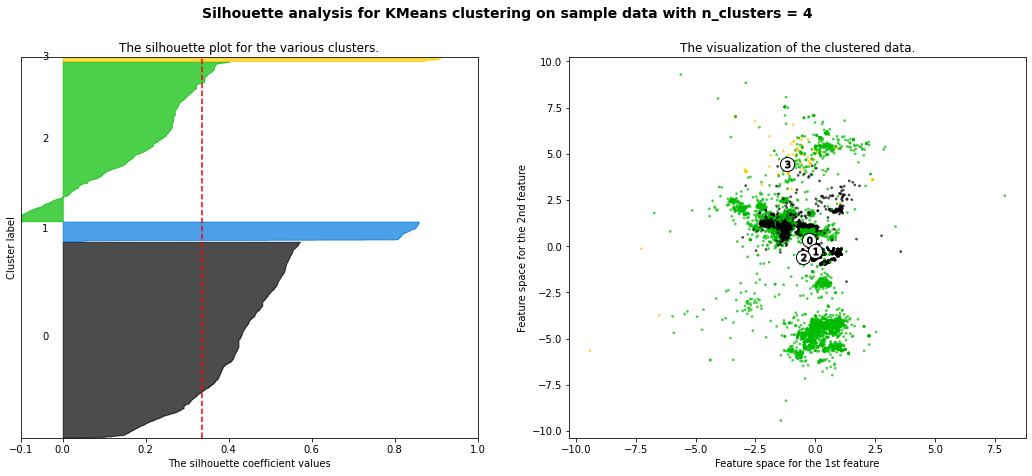

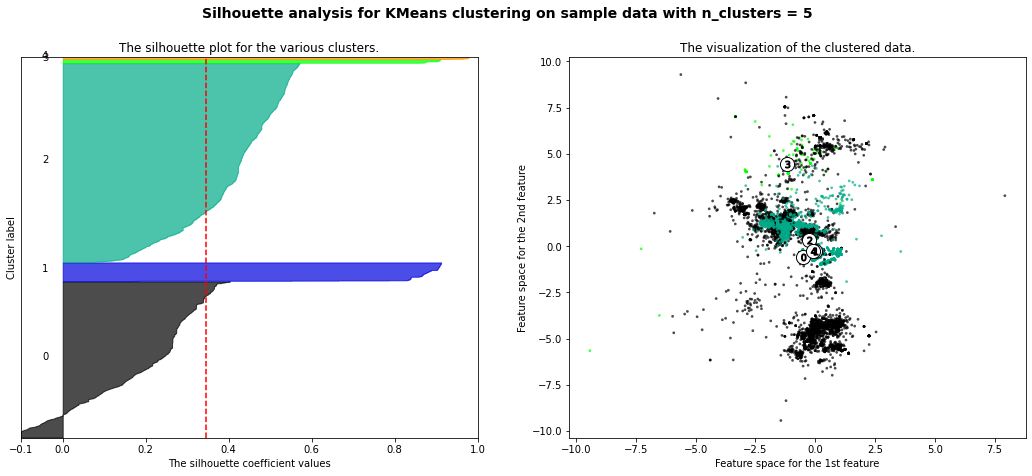

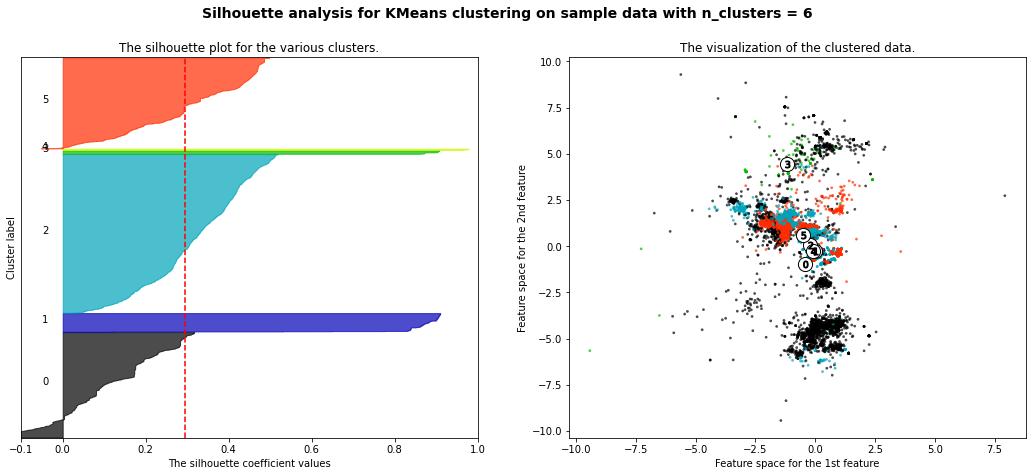

In [ ]:
silhouetteAnalysis(mrt_data_combined_features.values)

#Clustering

In [ ]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [ ]:
import pickle
# save the model to disk
filename = 'DTL_scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))
files.download('DTL_scaler.pkl')


filename = 'DTL_KmeansClustering.pkl'
pickle.dump(kmeans, open(filename, 'wb'))
files.download('DTL_KmeansClustering.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    10338
0      867
1      628
Name: cluster, dtype: int64

In [ ]:
mrt_data_combined['category'] = pred

In [ ]:
group = mrt_data_combined.groupby('category')

output = group.apply(lambda x: x['Station'].unique())

for i in output:
    print(i)

['DT5_Beauty_World' 'DT17_Downtown' 'DT35_Expo' 'DT1_Bukit_Panjang'
 'DT2_Cashew' 'DT3_Hillview' 'DT7_Sixth_Avenue' 'DT15_Promenade'
 'DT22_Jalan_Besar' 'DT27_Ubi' 'DT29_Bedok_North']
['DT19_Chinatown' 'DT20_Fort_Canning' 'DT21_Bencoolen' 'DT22_Jalan_Besar'
 'DT23_Bendemeer' 'DT24_Geylang_Bahru' 'DT15_Promenade']
['DT1_Bukit_Panjang' 'DT2_Cashew' 'DT3_Hillview' 'DT5_Beauty_World'
 'DT6_King_Albert_Park' 'DT7_Sixth_Avenue' 'DT8_Tan_Kah_Kee'
 'DT9_Botanic_Gardens' 'DT10_Stevens' 'DT11_Newton' 'DT12_Little_India'
 'DT13_Rochor' 'DT14_Bugis' 'DT15_Promenade' 'DT16_Bayfront'
 'DT17_Downtown' 'DT18_Telok Ayer' 'DT19_Chinatown' 'DT24_Geylang_Bahru'
 'DT25_Mattar' 'DT26_MacPherson' 'DT27_Ubi' 'DT28_Kaki_Bukit'
 'DT29_Bedok_North' 'DT30_Bedok_Reservoir' 'DT31_Tampines_West'
 'DT32_Tampines' 'DT33_Tempines_East' 'DT34_Upper_Changi' 'DT35_Expo'
 'DT20_Fort_Canning' 'DT21_Bencoolen' 'DT22_Jalan_Besar' 'DT23_Bendemeer']


In [ ]:
group0_combined = mrt_data_combined[mrt_data_combined['category'] == 0]
group1_combined = mrt_data_combined[mrt_data_combined['category'] == 1]
group2_combined = mrt_data_combined[mrt_data_combined['category'] == 2]
#group3_combined = mrt_data_combined[mrt_data_combined['category'] == 3]
for i in features:
    group0_combined[i].fillna(0, inplace=True) #can try fill with mean?
    group1_combined[i].fillna(0, inplace=True)
    group2_combined[i].fillna(0, inplace=True)
    #group3_combined[i].fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
def visualizationAfterClustering(data1, data2, data3, data4, data5, data6):
  '''visualise the data for each numerical variables after clustering using different colours'''
  '''if less than 6 clusters, put 'None' as parameter'''
  plt.figure(figsize=(20,72))
  for i, col in enumerate(['Acc_Lin_X', 'Acc_Lin_Y', 'Acc_Lin_Z', 'Acc_X', 'Acc_Y','Acc_Z', 'Bar_Pressure', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y','Mag_Z'],start=1):
    plt.subplot(8,2,i)
    plt.plot(data1[col],'.y',label='Cluster 1')
    if data2 is not None:
      plt.plot(data2[col],'.r',label='Cluster 2')
    if data3 is not None:
      plt.plot(data3[col],'.g',label='Cluster 3')
    if data4 is not None:
      plt.plot(data4[col],'.b',label='Cluster 4')
    if data5 is not None:
      plt.plot(data5[col],'.c',label='Cluster 5')
    if data6 is not None:
      plt.plot(data6[col],'.m',label='Cluster 6')
    plt.title(col)
  plt.legend()
  plt.xlabel('Time') #actually is the index count
  plt.title(col)

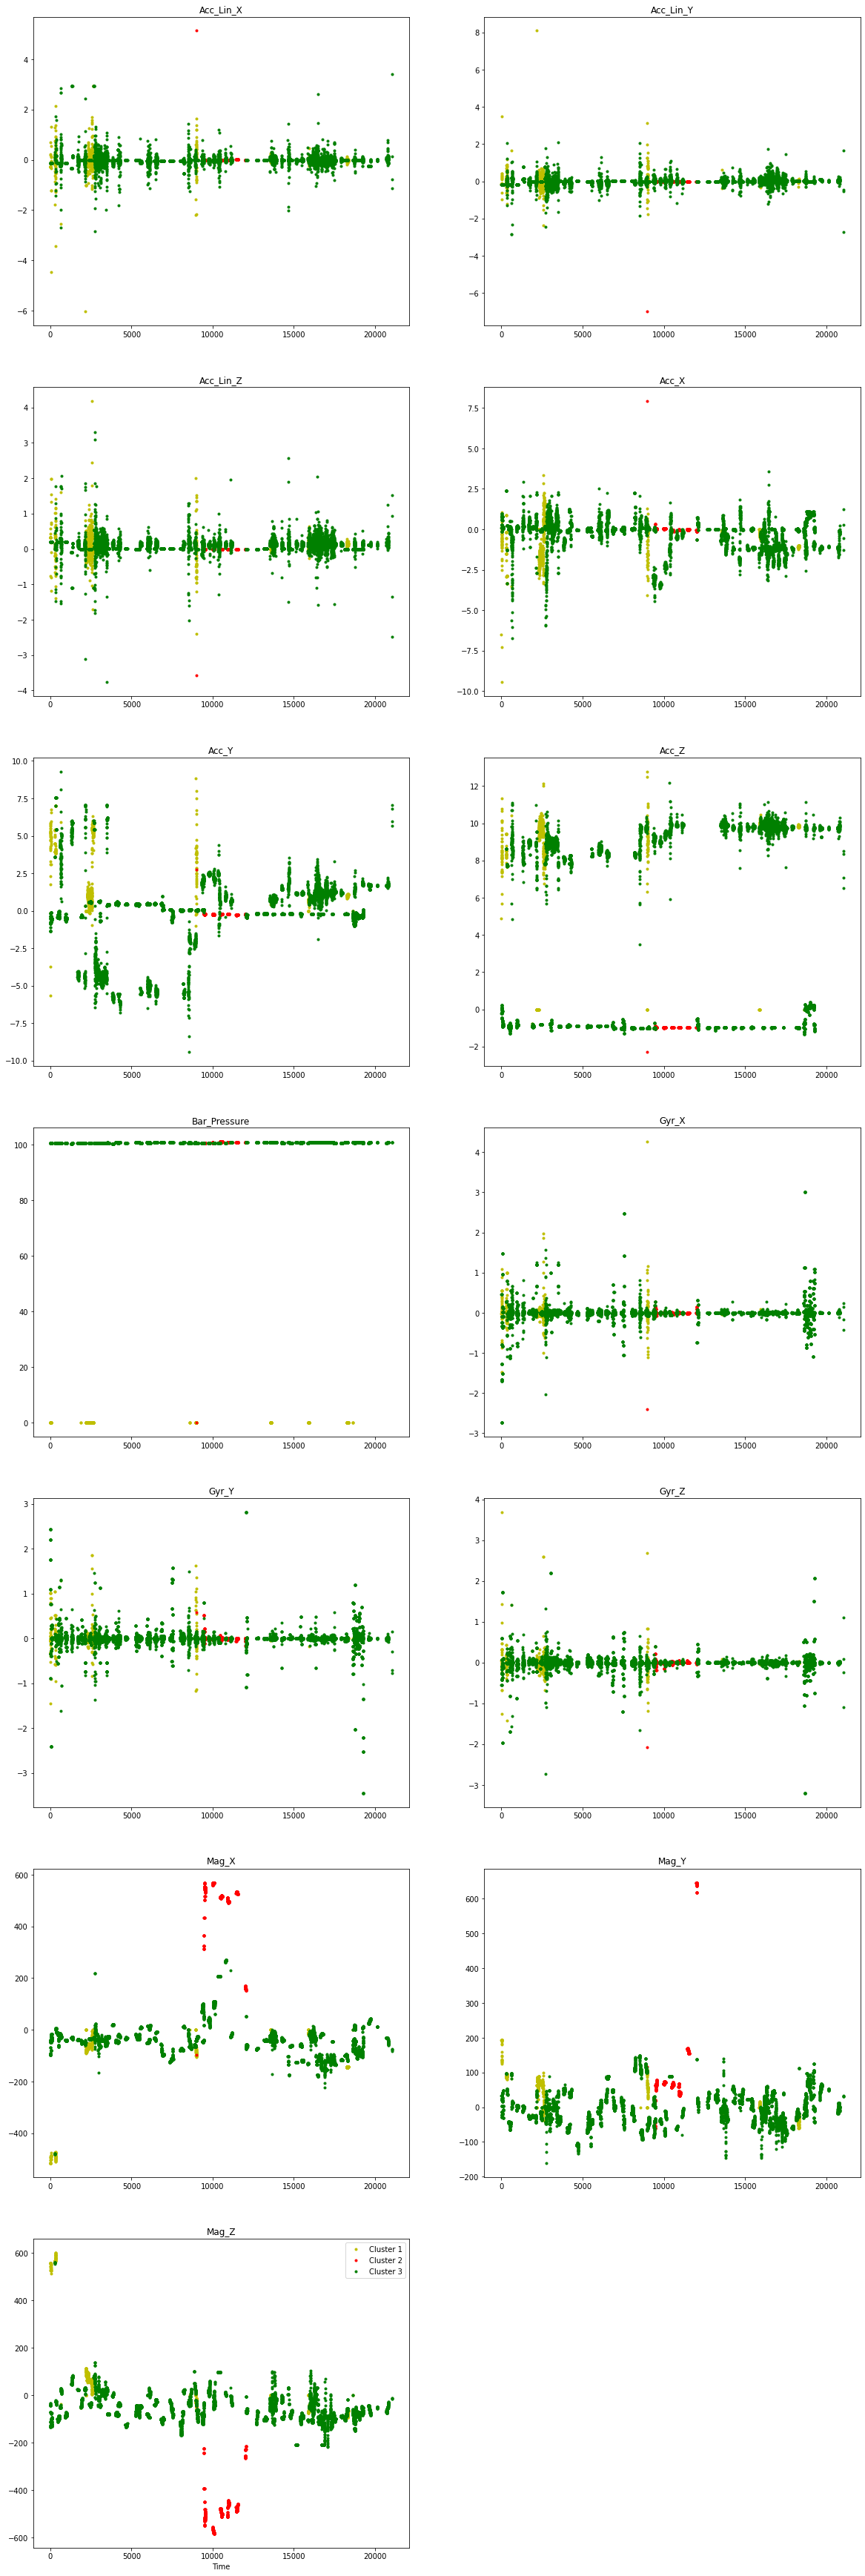

In [ ]:
visualizationAfterClustering(group0_combined,group1_combined,group2_combined,None,None,None)

#Prediction based on clusters

In [ ]:
RFC    = RandomForestClassifier(n_estimators=10, max_depth=50)
def randomforest_stationprediction_cluster(group):
    cfeatures = group[[ 'Acc_Z', 'Bar_Pressure','Mag_X', 'Acc_Y', 'Mag_Z']]

    # The ground truth
    cmode = group['Station']

    # Normalize the feature values
    cfeatures_normalized=(cfeatures-cfeatures.mean())/cfeatures.std()
    
    x_train, x_test, y_train, y_test = train_test_split(cfeatures_normalized, cmode, test_size=0.3)
    
    RFC.fit(x_train, y_train)

    rfc_predict  = RFC.predict(x_test)

    # Confusion matrix
    print("=== Confusion Matrix ===")
    print(confusion_matrix(y_test, rfc_predict))
    print('\n')

    # Classification Report
    print("=== Classification Report ===")
    print(classification_report(y_test, rfc_predict))
    print('\n')

##Group 0

In [ ]:
randomforest_stationprediction_cluster(group0_combined)
filename = 'RFC_cluster0.pkl'
pickle.dump(RFC, open(filename, 'wb'))
files.download('RFC_cluster0.pkl')

=== Confusion Matrix ===
[[ 15   0   1   0   0   0   4]
 [  0  14   0   0   0   0   0]
 [  0   0  11   0   0   0   0]
 [  0   0   0  16   0   0   2]
 [  0   0   0   0  26   0   0]
 [  0   0   0   0   0  19   0]
 [  0   0   0   0   0   0 153]]


=== Classification Report ===
                   precision    recall  f1-score   support

   DT15_Promenade       1.00      0.75      0.86        20
DT1_Bukit_Panjang       1.00      1.00      1.00        14
 DT22_Jalan_Besar       0.92      1.00      0.96        11
         DT27_Ubi       1.00      0.89      0.94        18
 DT29_Bedok_North       1.00      1.00      1.00        26
       DT2_Cashew       1.00      1.00      1.00        19
 DT7_Sixth_Avenue       0.96      1.00      0.98       153

         accuracy                           0.97       261
        macro avg       0.98      0.95      0.96       261
     weighted avg       0.97      0.97      0.97       261





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Group 1

In [ ]:
randomforest_stationprediction_cluster(group1_combined)
filename = 'RFC_cluster1.pkl'
pickle.dump(RFC, open(filename, 'wb'))
files.download('RFC_cluster1.pkl')

=== Confusion Matrix ===
[[24  0  0  0  0  0]
 [ 0 35  0  0  0  0]
 [ 0  0 43  0  0  0]
 [ 0  0  0 41  0  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 11]]


=== Classification Report ===
                    precision    recall  f1-score   support

    DT19_Chinatown       1.00      1.00      1.00        24
 DT20_Fort_Canning       1.00      1.00      1.00        35
    DT21_Bencoolen       1.00      1.00      1.00        43
  DT22_Jalan_Besar       1.00      1.00      1.00        41
    DT23_Bendemeer       1.00      1.00      1.00        35
DT24_Geylang_Bahru       1.00      1.00      1.00        11

          accuracy                           1.00       189
         macro avg       1.00      1.00      1.00       189
      weighted avg       1.00      1.00      1.00       189





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Group 2

In [ ]:
randomforest_stationprediction_cluster(group2_combined)
filename = 'RFC_cluster2.pkl'
pickle.dump(RFC, open(filename, 'wb'))
files.download('RFC_cluster2.pkl')

=== Confusion Matrix ===
[[ 60   0   0 ...   0   0   0]
 [  0 125   0 ...   0   0   0]
 [  0   0  98 ...   0   0   0]
 ...
 [  0   0   0 ... 269   0   0]
 [  0   0   0 ...   0  65   0]
 [  0   0   0 ...   0   0  93]]


=== Classification Report ===
                      precision    recall  f1-score   support

        DT10_Stevens       1.00      1.00      1.00        60
         DT11_Newton       1.00      1.00      1.00       125
   DT12_Little_India       1.00      1.00      1.00        98
         DT13_Rochor       1.00      1.00      1.00        53
          DT14_Bugis       1.00      1.00      1.00        94
      DT15_Promenade       1.00      1.00      1.00        89
       DT16_Bayfront       1.00      1.00      1.00       108
       DT17_Downtown       1.00      1.00      1.00        68
     DT18_Telok Ayer       1.00      1.00      1.00        86
      DT19_Chinatown       1.00      1.00      1.00        57
   DT1_Bukit_Panjang       1.00      1.00      1.00        29
   DT2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>